In [3]:
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

import string
from collections import Counter


In [4]:
responses = pd.read_csv(r'./Data/formresponses.csv')

In [5]:
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
lemmatizer = WordNetLemmatizer()

In [7]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [8]:
def noun_str(str):
    noun_list = []
    tokens = nltk.pos_tag(nltk.word_tokenize(str))
    for token in tokens:
        if token[1] == 'NN':
            noun_list.append(token[0])
    finalnounq1 = " ".join(noun_list)
    return finalnounq1


In [9]:
def adj_str(str):
    adj_list = []
    tokens = nltk.pos_tag(nltk.word_tokenize(str))
    for token in tokens:
        if token[1] == 'JJ' or token[1] == 'JJR' or token[1] == 'JJS' or token[1] == 'RV' or token[1] == 'RVR' or token[1] == 'RVS':
            adj_list.append(token[0])
    adj_str = " ".join(adj_list)
    return adj_str





[('hi', 'NN'), ('.', '.'), ('i', 'NN'), ('am', 'VBP')]

QUESTION 1

In [10]:
alltextq1 = responses['What are things that make you glad to live in Grinnell?  '].dropna()
listtextq1 = alltextq1.tolist()

#to prevent College and college being different
strtextq1 = " ".join(listtextq1).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq1 = re.split(r',| ', strtextq1)
#to get rid of stop words
listtext_withoutstopwordsq1 = [i for i in listtextonewordq1 if i not in sw_nltk]
lemmatized_textq1 = [lemmatizer.lemmatize(word) for word in listtext_withoutstopwordsq1]

finaltextq1 = " ".join(lemmatized_textq1)

# #visualize
# wordcloud = WordCloud().generate(finaltextq1)
# plt.title("Q1: What are things that make you glad to live in Grinnell?")
# plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq1)



In [11]:
wcq1 = word_count(finaltextq1)
wcsortedq1 = sorted(wcq1.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq1 = dict(wcsortedq1)
print(dict_wcsortedq1)

{'community': 141, 'town': 95, 'small': 89, 'grinnell': 79, 'college': 75, 'people': 69, 'good': 53, 'park': 52, 'great': 39, 'size': 39, 'family': 38, 'like': 35, 'downtown': 35, 'lot': 31, 'live': 31, 'nice': 31, 'love': 30, 'school': 30, 'friendly': 28, 'safe': 28, 'easy': 28, 'get': 28, 'feel': 26, 'low': 25, 'art': 24, 'living': 23, 'city': 22, 'library': 22, 'restaurant': 21, 'event': 21, 'opportunity': 21, 'local': 20, 'many': 19, 'diversity': 19, 'business': 19, 'work': 18, 'close': 18, 'crime': 18, 'access': 17, 'beautiful': 17, 'place': 17, '-': 16, 'store': 16, 'friend': 16, 'music': 15, 'town.': 15, 'activity': 14, 'know': 14, 'traffic': 14, 'shop': 13, 'also': 13, 'market': 13, 'community.': 13, 'people.': 13, 'public': 13, 'around': 13, 'grinnell.': 13, '&': 12, 'thing': 12, 'farmer': 11, 'make': 11, 'safety': 11, 'well': 11, 'sense': 11, 'walkable': 11, 'care': 11, 'rate': 11, 'the': 10, 'high': 10, 'area': 10, 'bike': 10, 'hospital': 10, 'service': 10, 'center': 10, 'op

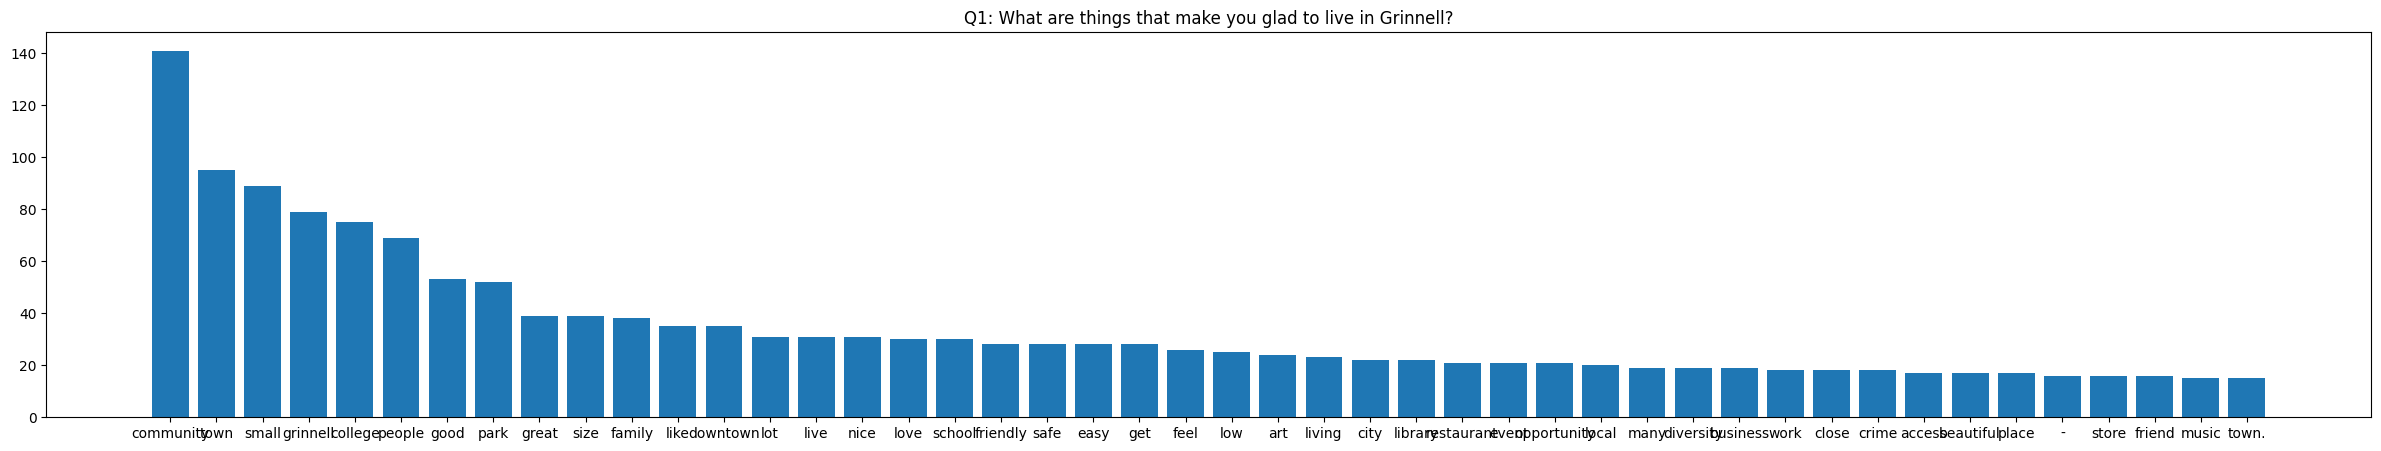

In [12]:
resultq1 = {key:value for (key, value) in dict_wcsortedq1.items() if value >= 15}

wordsq1 = list(resultq1.keys())
countsq1 = list(resultq1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(resultq1)), countsq1, tick_label=wordsq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'community': 157, 'town': 114, 'college': 87, 'grinnell': 64, 'park': 48, 'size': 44, 'family': 42, 'school': 33, 'lot': 25, 'city': 25, 'event': 21, 'opportunity': 21, 'downtown': 20, 'crime': 20, 'place': 19, 'art': 19, 'diversity': 19, 'business': 19, 'work': 18, 'access': 18, 'restaurant': 17, 'music': 16, 'market': 16, 'feel': 15, 'traffic': 15, 'farmer': 14, 'area': 14, 'store': 14, 'activity': 14, 'rate': 14, 'living': 14, 'shop': 13, 'care': 13, 'safety': 12, 'service': 12, 'thing': 12, 'time': 11, 'center': 10, 'year': 10, 'sense': 10, 'option': 10, 'cost': 10, 'history': 9, 'proximity': 9, 'hospital': 9, 'location': 9, 'get': 9, 'variety': 9, 'population': 9, 'space': 9, 'friend': 9, 'summer': 8, 'student': 8, 'neighbor': 8, 'resource': 7, 'etc': 7, 'everyone': 7, 'quality': 7, 'grocery': 7, 'movie': 7, 'job': 7, 'day': 7, 'distance': 7, 'theater': 7, 'church': 7, 'campus': 7, 'saint': 6, 'rest': 6, 's': 6, 'prairie': 6, 'museum': 6, 'drive': 6, 'presence': 6, 'help': 6, 'co

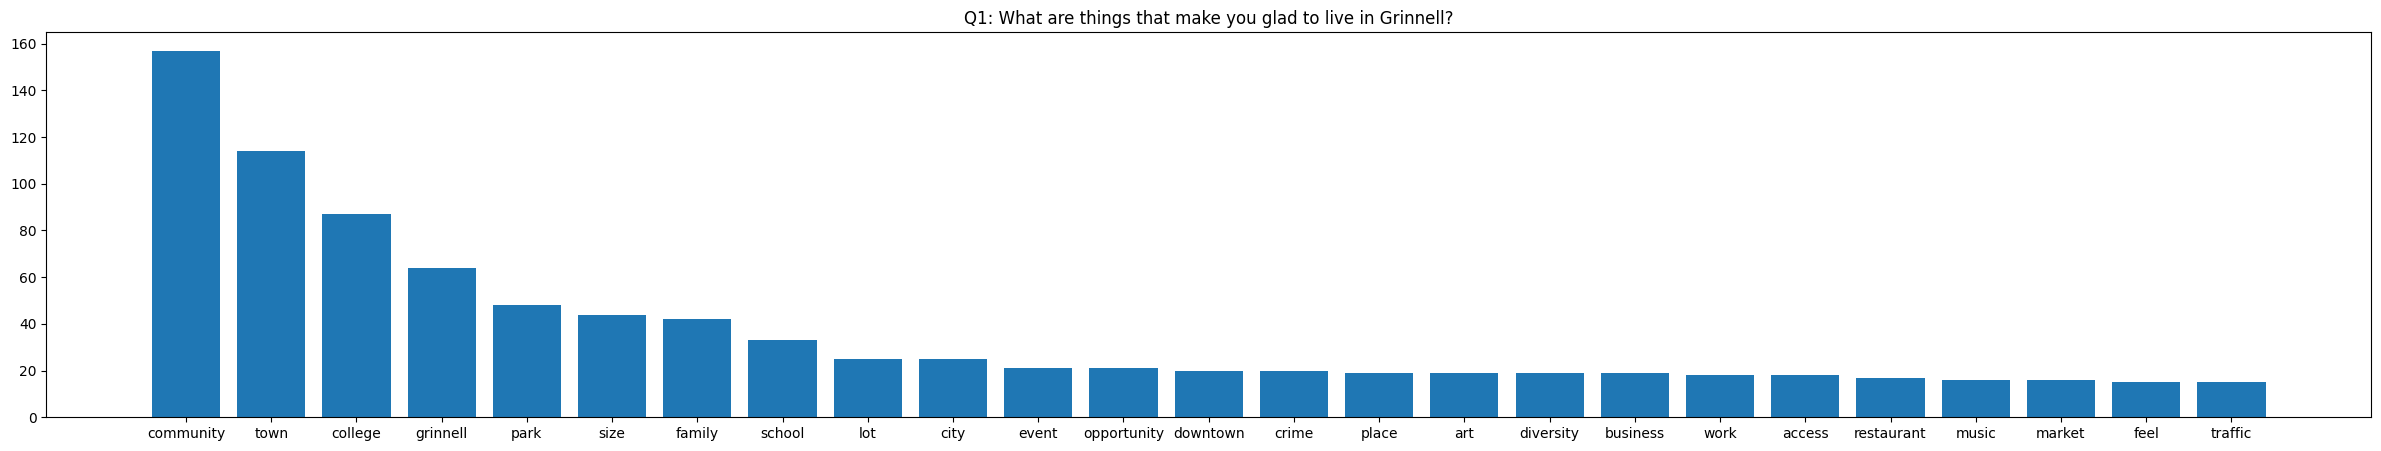

In [13]:
#Nouns count for question 1

nounsq1 = noun_str(finaltextq1)
ncq1 = word_count(nounsq1)
sorted_nouns1 = sorted(ncq1.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsq1 = dict(sorted_nouns1)
print(dict_sorted_nounsq1)

nouns_resultq1 = {key:value for (key, value) in dict_sorted_nounsq1.items() if value >= 15}

nouns_keyq1 = list(nouns_resultq1.keys())
nouns_countsq1 = list(nouns_resultq1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultq1)), nouns_countsq1, tick_label=nouns_keyq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()


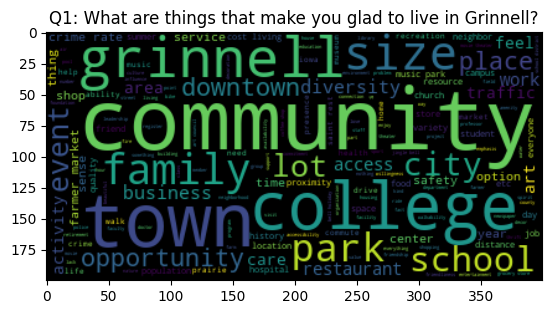

In [14]:

#visualize
wordcloud = WordCloud().generate(nounsq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')

{'small': 89, 'good': 54, 'great': 40, 'safe': 33, 'nice': 33, 'easy': 28, 'low': 26, 'friendly': 24, 'local': 21, 'many': 20, 'library': 18, 'downtown': 16, 'close': 15, 'live': 14, 'walkable': 14, 'public': 13, 'beautiful': 13, 'big': 11, 'clean': 11, 'high': 10, 'smaller': 8, 'medical': 7, 'active': 7, 'strong': 7, 'historical': 7, 'athletic': 6, 'free': 6, 'u': 6, 'little': 6, 'relative': 6, 'hard': 6, 'quiet': 6, 'central': 5, 'social': 5, 'available': 5, '’': 5, 'able': 5, 'park': 5, 'know': 5, 'affordable': 5, 'much': 5, 'new': 5, 'reasonable': 5, 'accessible': 5, 'iowa': 4, 'various': 4, 'recreational': 4, 'old': 4, 'other': 4, 'aquatic': 4, 'excellent': 4, 'restaurant': 4, 'open': 4, 'natural': 3, 'pleasant': 3, 'mutual': 3, 'progressive': 3, 'supportive': 3, 'short': 3, 'large': 3, 'national': 3, 's': 3, 'happy': 3, 'glad': 3, 'wide': 3, 'general': 3, 'larger': 3, 'rural': 3, 'individual': 3, 'green': 3, 'historic': 3, 'interesting': 2, 'stable': 2, 'tree': 2, 'outside': 2, '

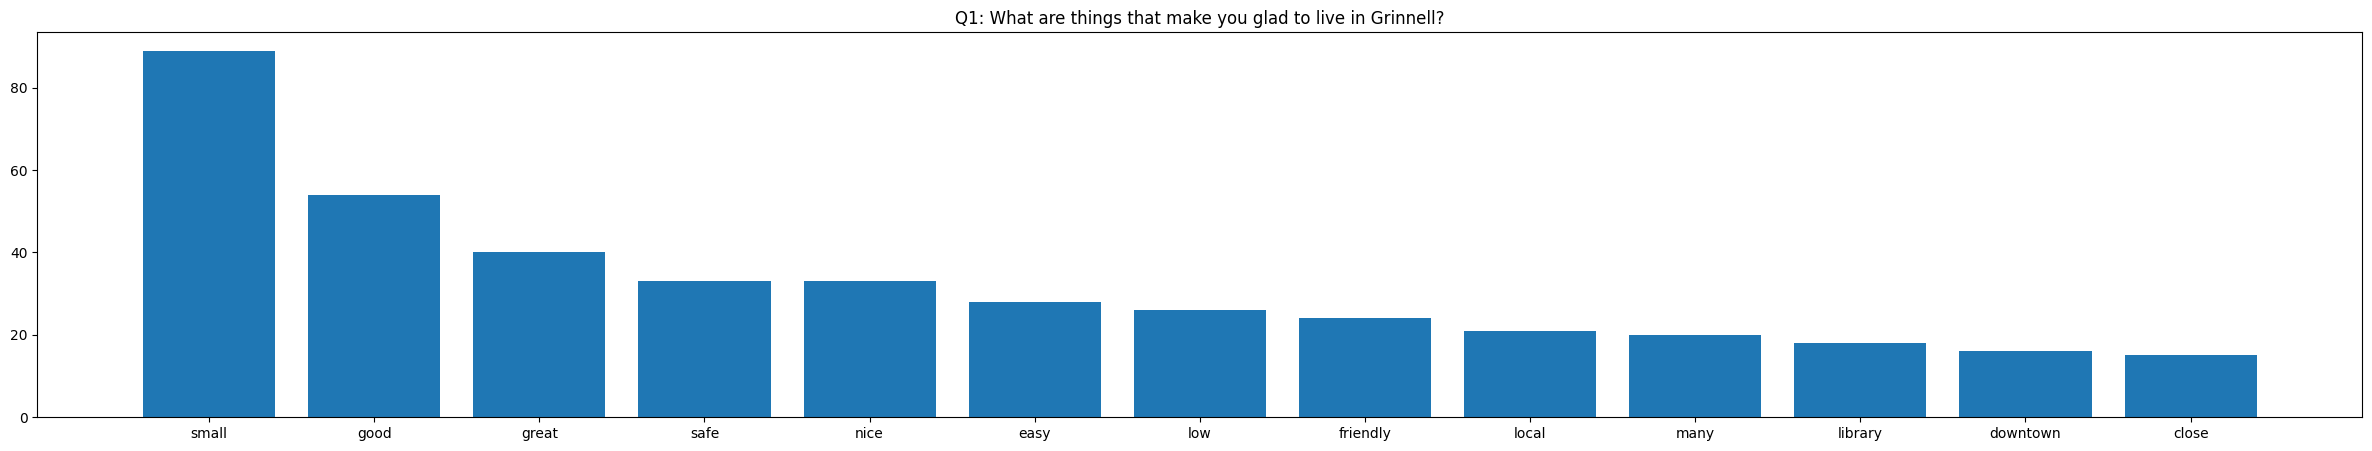

In [15]:
#Adjectives count for question 1

adjsq1 = adj_str(finaltextq1)
ncq1 = word_count(adjsq1)
sorted_adjs1 = sorted(ncq1.items(), key=lambda x:x[1], reverse=True)
dict_sorted_adjsq1 = dict(sorted_adjs1)
print(dict_sorted_adjsq1)

adjs_resultq1 = {key:value for (key, value) in dict_sorted_adjsq1.items() if value >= 15}

adjs_keyq1 = list(adjs_resultq1.keys())
adjs_countsq1 = list(adjs_resultq1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(adjs_resultq1)), adjs_countsq1, tick_label=adjs_keyq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

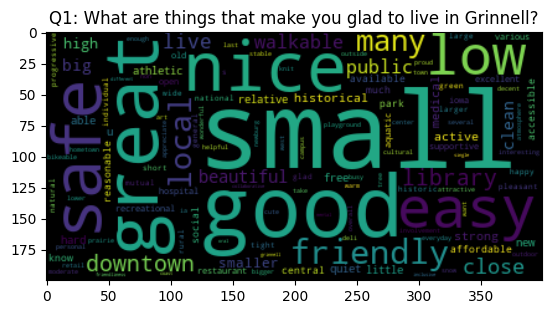

In [16]:
#visualize
wordcloud = WordCloud().generate(adjsq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')

QUESTION 2

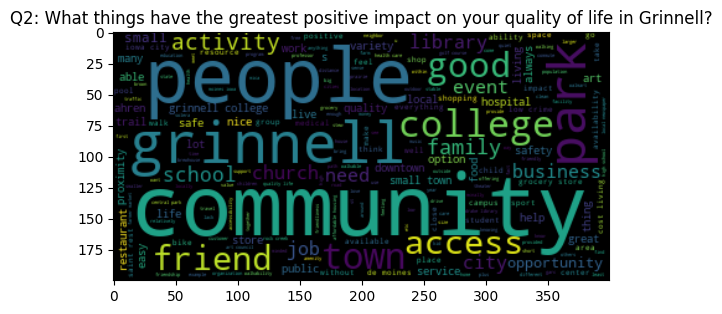

In [17]:
alltextq2 = responses['What things have the greatest positive impact on your quality of life in Grinnell? '].dropna()
listtextq2 = alltextq2.tolist()

#to prevent College and college being different
strtextq2 = " ".join(listtextq2).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq2 = re.split(r',| ', strtextq2)
#to get rid of stop words
listtext_withoutstopwordsq2 = [i for i in listtextonewordq2 if i not in sw_nltk]
lemmatized_textq2 = [lemmatizer.lemmatize(word) for word in listtext_withoutstopwordsq2]
finaltextq2 = " ".join(lemmatized_textq2)

#visualize
wordcloud = WordCloud().generate(finaltextq2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq2)
# print(finaltextq2)


In [18]:
wcq2 = word_count(finaltextq2)
wcsortedq2 = sorted(wcq2.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq2 = dict(wcsortedq2)
print(dict_wcsortedq2)

{'community': 74, 'people': 60, 'grinnell': 57, 'college': 48, 'park': 39, 'town': 36, 'good': 35, 'activity': 32, 'access': 30, 'small': 30, 'school': 28, 'friend': 26, 'city': 24, 'family': 23, 'business': 22, 'job': 21, 'opportunity': 21, 'church': 21, 'quality': 20, 'library': 20, 'local': 18, 'event': 18, 'living': 18, 'art': 18, 'need': 17, 'nice': 15, 'store': 14, 'like': 14, 'public': 13, 'restaurant': 12, 'able': 12, 'work': 12, 'great': 12, 'high': 12, 'thing': 12, 'easy': 12, 'grocery': 12, '-': 12, 'community.': 11, 'variety': 11, 'low': 11, 'grinnell.': 11, 'service': 11, 'lot': 11, 'food': 11, 'always': 10, 'many': 10, 'proximity': 10, '&': 10, 'life': 10, 'live': 10, 'help': 10, 'get': 10, 'downtown': 10, 'iowa': 10, 'medical': 9, 'rest': 9, 'hospital': 9, 'cost': 9, 'safety': 9, 'also': 9, 'place': 8, 'town.': 8, 'availability': 8, 'shop': 8, 'resource': 8, 'student': 8, 'safe': 8, 'de': 8, 'everything': 8, 'care': 8, 'health': 8, 'impact': 8, 'ahrens': 7, 'crime': 7, '

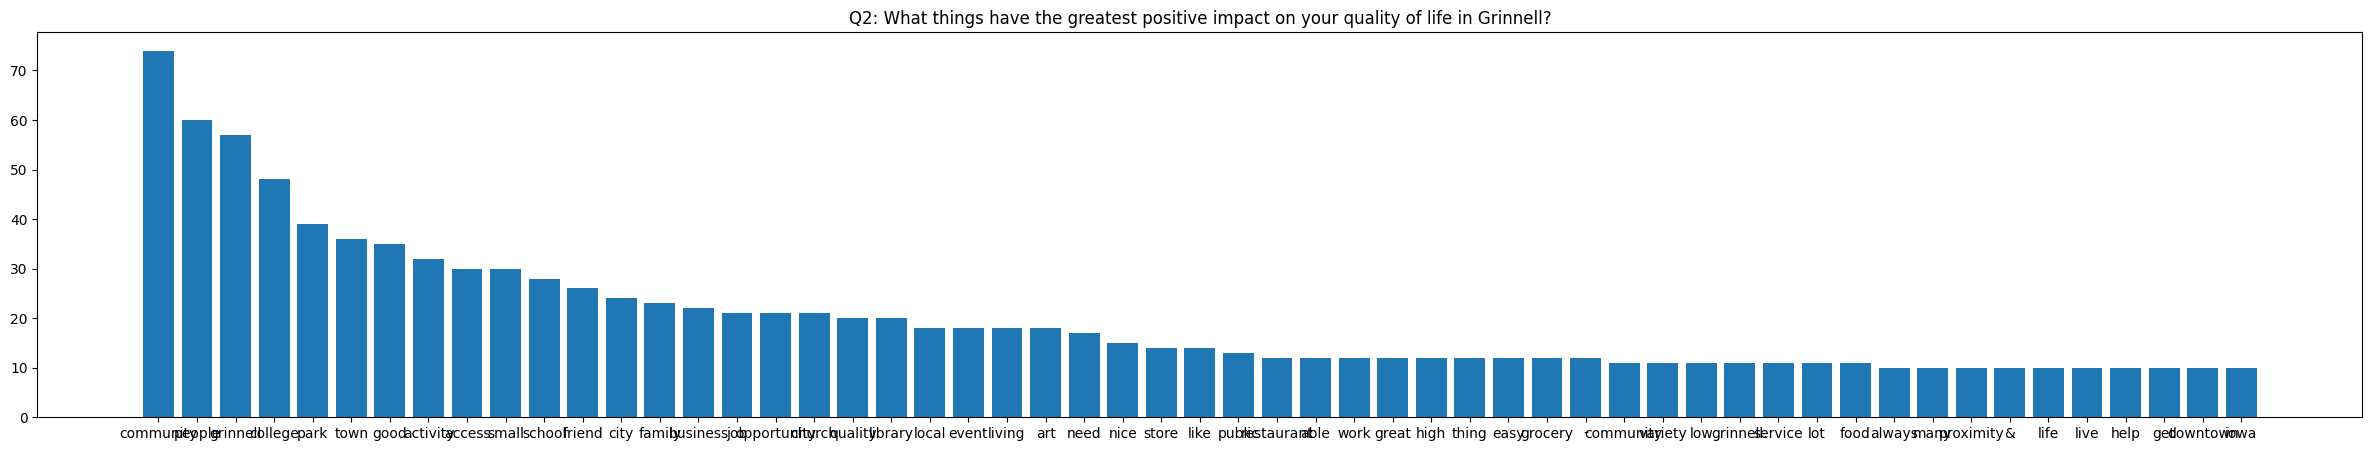

In [19]:
resultq2 = {key:value for (key, value) in dict_wcsortedq2.items() if value >= 10}

wordsq2 = list(resultq2.keys())
countsq2 = list(resultq2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(resultq2)), countsq2, tick_label=wordsq2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

QUESTION 8

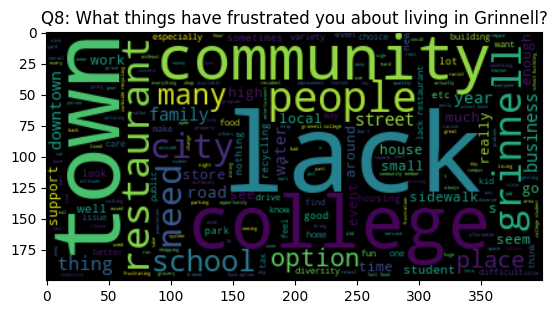

In [20]:
alltextq8 = responses['What things have frustrated you about living in Grinnell?'].dropna()
listtextq8 = alltextq8.tolist()

#to prevent College and college being different
strtextq8 = " ".join(listtextq8).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq8 = re.split(r',| ', strtextq8)
#to get rid of stop words
listtext_withoutstopwordsq8 = [i for i in listtextonewordq8 if i not in sw_nltk]
lemmatized_textq8 = [lemmatizer.lemmatize(word) for word in listtext_withoutstopwordsq8]
finaltextq8 = " ".join(lemmatized_textq8)

#visualize
wordcloud = WordCloud().generate(finaltextq8)
plt.title("Q8: What things have frustrated you about living in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq2)
# print(finaltextq2)


In [21]:
wcq8 = word_count(finaltextq8)
wcsortedq8 = sorted(wcq8.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq8 = dict(wcsortedq8)
print(dict_wcsortedq8)

{'lack': 149, 'college': 99, 'community': 98, 'people': 81, 'restaurant': 79, 'town': 77, 'school': 75, 'grinnell': 67, 'need': 55, 'many': 55, 'city': 45, 'like': 45, 'place': 40, '-': 39, 'would': 38, 'option': 38, 'get': 36, 'family': 34, 'thing': 34, 'food': 33, 'also': 33, 'business': 33, 'road': 27, 'local': 27, 'street': 26, 'water': 26, 'see': 25, 'support': 25, 'building': 24, 'sidewalk': 23, 'student': 23, 'small': 23, 'recycling': 22, 'tax': 21, 'work': 21, 'downtown': 21, 'year': 21, 'enough': 21, 'feel': 21, 'really': 20, 'around': 20, 'nothing': 20, 'go': 20, 'even': 19, 'much': 19, 'time': 19, 'look': 19, 'high': 19, 'issue': 19, 'town.': 19, 'store': 18, 'make': 18, 'find': 18, 'lot': 18, 'new': 18, 'could': 17, 'park': 17, 'sometimes': 17, 'think': 17, 'good': 17, 'public': 17, 'grinnell.': 17, 'care': 17, 'housing': 16, 'event': 16, 'house': 16, 'member': 16, 'property': 15, 'price': 15, 'seems': 15, 'home': 15, 'bond': 15, '&': 15, 'well': 15, 'know': 15, 'difficult'

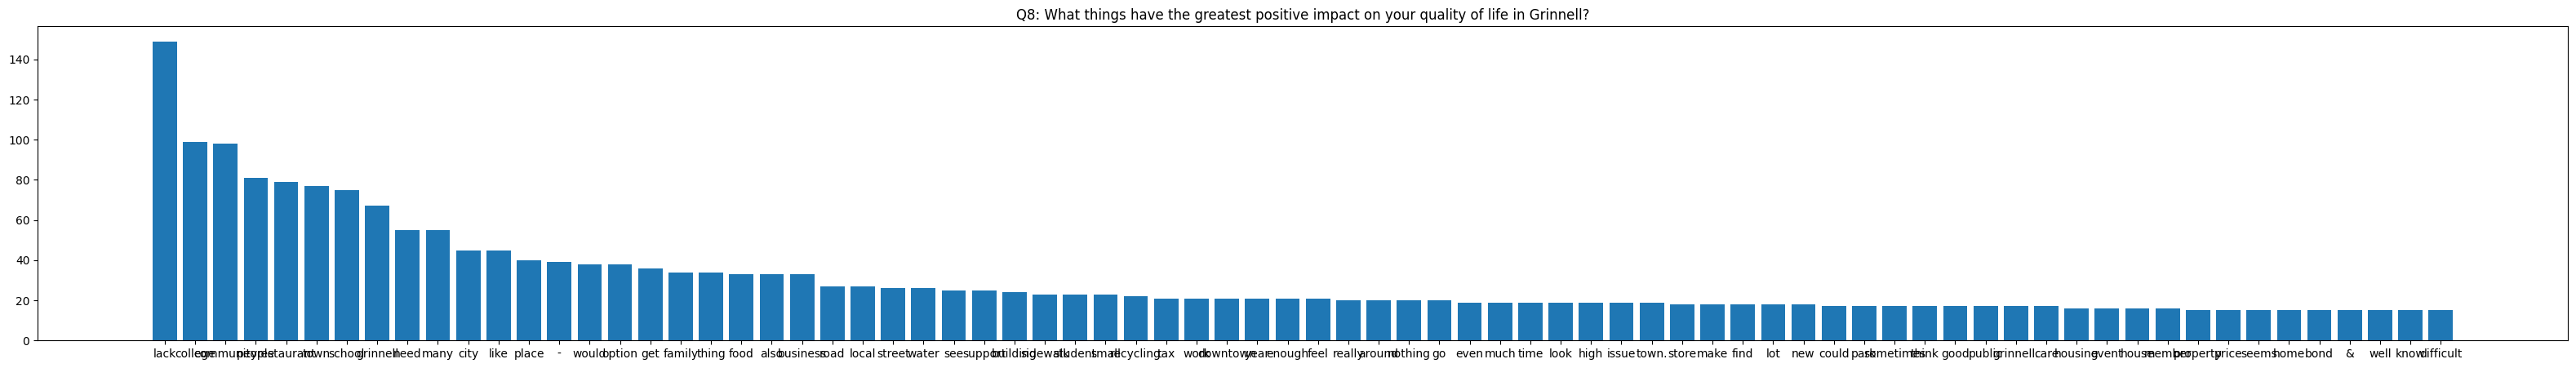

In [22]:
resultq8 = {key:value for (key, value) in dict_wcsortedq8.items() if value >= 15}


wordsq8 = list(resultq8.keys())
countsq8 = list(resultq8.values())
#resizing
fig = plt.figure(figsize=(40, 5))
plt.bar(range(len(resultq8)), countsq8, tick_label=wordsq8)
plt.title("Q8: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

NEW ADDITION: Taking care of only counting a word appearing once per response. PRINTS OUT DICTIONARY WITH NUMBER OF OCCURENCES OF EACH WORD. CAN DO VISUALIZATIONS ON THIS UPDATED COUNTS IF NEEDED, AND CAN REPLICATE FOR EACH QUESTION IF NEEDED. Spellchecking is also taken care of.


QUESTION 1

In [27]:
import string
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download the stopwords from nltk
nltk.download('stopwords')
nltk.download('words')

# Define the column of string-type records
# records = ['this sample is a sample record', 'another record with a word in it', 'yet another record with the same word']
records = responses['What things have frustrated you about living in Grinnell?'].dropna()

# Define the stop words to be removed
stop_words = set(stopwords.words('english'))

# Define the vocabulary of correctly spelled words
vocab = set(words.words())

# Initialize an empty Counter object
word_counts = Counter()

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Loop over each record in the column
for record in records:
    # Split the record into individual words and remove punctuation
    words = word_tokenize(record.lower().translate(str.maketrans('', '', string.punctuation)))
    
    # Remove stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    # Spell check each word and replace any misspelled words with the original word
    words = [word if word in vocab else word.lower() for word in words]
    
    #lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words]

    # Count the number of occurrences of each word in the record
    record_word_counts = Counter(set(words))
    
    # Add the record's word counts to the overall word count
    word_counts += record_word_counts

# Print the final word count dictionary
print(word_counts)


Counter({'lack': 117, 'restaurant': 85, 'community': 78, 'college': 75, 'town': 73, 'school': 71, 'people': 65, 'grinnell': 60, 'need': 47, 'many': 46, 'city': 42, 'option': 41, 'business': 38, '’': 37, 'like': 37, 'place': 35, 'get': 34, 'thing': 33, 'also': 32, 'year': 31, 'family': 30, 'food': 30, 'dont': 30, 'would': 29, 'road': 27, 'support': 27, 'time': 25, 'see': 24, 'downtown': 24, 'water': 24, 'work': 23, 'building': 23, 'store': 22, 'street': 22, 'much': 22, 'recycling': 22, 'enough': 22, 'really': 21, 'high': 21, 'student': 20, 'small': 20, 'feel': 20, 'go': 20, 'issue': 19, 'house': 19, 'tax': 18, 'even': 18, 'etc': 18, 'around': 18, 'well': 18, 'member': 18, 'public': 18, 'nothing': 18, 'sometimes': 17, 'especially': 17, 'local': 17, 'lot': 17, 'good': 17, 'care': 17, 'housing': 16, 'could': 16, 'park': 16, 'look': 16, 'make': 16, 'think': 16, 'new': 15, 'difficult': 15, 'better': 14, 'property': 14, 'want': 14, 'sidewalk': 14, 'event': 14, 'seems': 14, 'bond': 14, 'one': 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package words is already up-to-date!


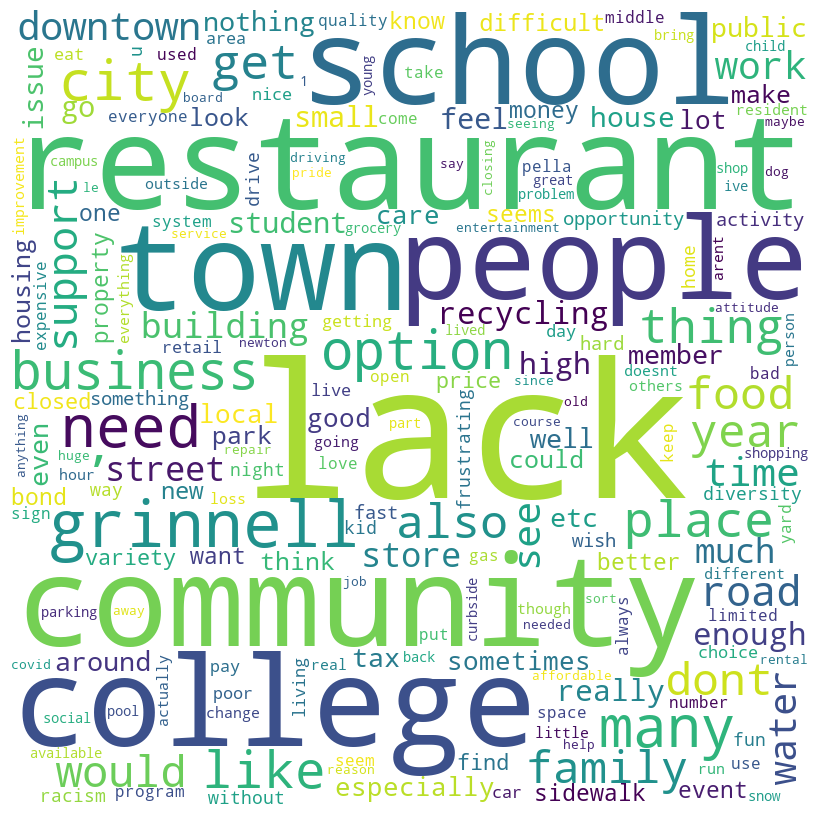

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


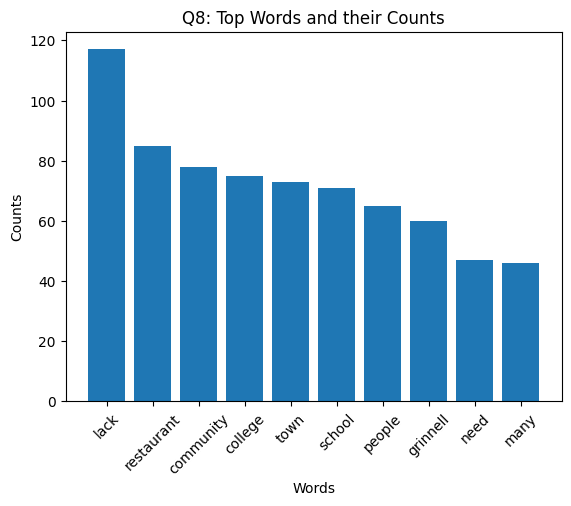

In [25]:
import matplotlib.pyplot as plt

# Get the top 10 words and their counts
top_words = word_counts.most_common(10)
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# Create a bar plot of the top words and their counts
plt.bar(words, counts)
plt.title('Q8: Top Words and their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.show()


In [26]:
# Display the exact word counts for the top words
for word, count in top_words:
    print(f'{word}: {count}')


lack: 117
restaurant: 85
community: 78
college: 75
town: 73
school: 71
people: 65
grinnell: 60
need: 47
many: 46


QUESTION 1

Counter({'community': 134, 'town': 97, 'small': 84, 'people': 78, 'college': 77, 'grinnell': 67, 'park': 51, 'good': 44, 'size': 42, 'downtown': 39, 'family': 38, 'great': 35, 'friendly': 32, 'school': 32, 'safe': 32, 'like': 30, 'nice': 30, 'lot': 29, 'live': 28, 'restaurant': 27, 'get': 27, 'low': 25, 'library': 24, 'easy': 24, 'feel': 24, 'living': 24, 'event': 23, 'city': 23, 'place': 22, 'art': 22, 'opportunity': 22, 'friend': 21, 'business': 21, 'crime': 21, 'local': 20, 'close': 19, 'diversity': 19, 'around': 19, 'work': 18, 'love': 18, 'store': 18, 'many': 17, 'activity': 17, 'access': 16, 'farmer': 15, 'music': 15, 'market': 15, 'walkable': 15, 'traffic': 15, '’': 14, 'beautiful': 14, 'rate': 14, 'area': 13, 'need': 13, 'option': 13, 'shop': 12, 'safety': 12, 'public': 12, 'know': 12, 'thing': 12, 'etc': 11, 'make': 11, 'dont': 11, 'well': 11, 'center': 11, 'hospital': 11, 'clean': 11, 'also': 10, 'iowa': 10, 'big': 10, 'walk': 10, 'sense': 10, 'care': 10, 'year': 10, 'neighbor': 10, 'go': 10, 'cost': 10, 'campus': 10, 'resource': 9, 'high': 9, 'bike': 9, 'service': 9, 'student': 9, 'location': 9, 'time': 9, 'population': 9, 'really': 9, 'space': 9, 'ahrens': 9, 'proximity': 8, 'smaller': 8, 'neighborhood': 8, 'quality': 8, 'rest': 8, 'variety': 8, 'friendliness': 8, 'pretty': 8, 'atmosphere': 8, 'church': 8, 'summer': 7, 'kid': 7, 'saint': 7, 'medical': 7, 'grocery': 7, 'drive': 7, 'active': 7, 'u': 7, 'help': 7, 'commute': 7, 'movie': 7, 'job': 7, 'caring': 7, 'distance': 7, 'food': 7, 'history': 6, 'everyone': 6, 'moines': 6, 'de': 6, 'prairie': 6, 'program': 6, 'enjoy': 6, 'athletic': 6, 'museum': 6, 'walkability': 6, 'free': 6, 'presence': 6, 'mostly': 6, 'drake': 6, 'grew': 6, 'strong': 6, 'home': 6, 'little': 6, 'historical': 6, 'ability': 6, 'relative': 6, 'hard': 6, 'life': 6, 'recreation': 6, 'quiet': 6, 'much': 6, 'everything': 6, 'theater': 6, 'holiday': 6, 'health': 6, 'vibe': 5, 'project': 5, 'central': 5, 'social': 5, 'take': 5, 'pleasant': 5, 'available': 5, 'shopping': 5, 'ride': 5, 'walking': 5, 'come': 5, 'enough': 5, 'facility': 5, 'involved': 5, 'able': 5, 'group': 5, 'nothing': 5, 'member': 5, 'new': 5, 'always': 5, 'especially': 5, 'offer': 5, 'day': 5, 'including': 5, 'pool': 5, 'reasonable': 5, 'sport': 5, 'bell': 5, 'want': 5, 'nearby': 5, 'welcoming': 5, 'accessible': 5, 'housing': 4, 'lake': 4, 'interesting': 4, 'outside': 4, 'keep': 4, 'found': 4, 'maintained': 4, 'council': 4, 'trail': 4, 'progressive': 4, 'various': 4, 'visit': 4, 'nature': 4, 'fairly': 4, 'recreational': 4, 'supportive': 4, 'old': 4, 'district': 4, 'value': 4, 'environment': 4, 'anywhere': 4, 'connected': 4, 'course': 4, 'past': 4, 'theatre': 4, 'aquatic': 4, 'support': 4, 'kept': 4, 'could': 4, 'excellent': 4, 'affordable': 4, 'feeling': 4, 'lack': 4, 'relatively': 4, 'farm': 4, 'appreciate': 4, 'organization': 4, 'accessibility': 4, 'retirement': 4, 'glad': 4, 'open': 4, 'given': 4, 'jingle': 4, 'connection': 4, 'walmart': 4, 'compared': 4, 'police': 4, 'part': 4, 'street': 4, 'professor': 4, 'natural': 3, 'tree': 3, 'water': 3, 'parade': 3, 'amenity': 3, 'mcnallys': 3, 'leadership': 3, 'moved': 3, 'knit': 3, 'vibrant': 3, 'easily': 3, 'newspaper': 3, 'getting': 3, 'provides': 3, 'without': 3, 'ease': 3, 'point': 3, 'mica': 3, 'participate': 3, 'working': 3, 'together': 3, 'field': 3, 'resident': 3, 'pride': 3, 'airport': 3, 'travel': 3, 'spirit': 3, 'run': 3, 'amazing': 3, 'decor': 3, 'cute': 3, 'dining': 3, 'retail': 3, 'influence': 3, 'short': 3, 'think': 3, 'teacher': 3, 'large': 3, 'road': 3, 'building': 3, '1': 3, 'friendship': 3, 'fact': 3, 'every': 3, 'kind': 3, 'commitment': 3, 'number': 3, 'others': 3, 'air': 3, 'locally': 3, 'happy': 3, 'raised': 3, 'born': 3, 'far': 3, 'wide': 3, 'problem': 3, 'culture': 3, 'general': 3, 'staff': 3, 'coffee': 3, 'give': 3, 'larger': 3, 'outdoor': 3, 'better': 3, 'something': 3, 'way': 3, 'thrift': 3, 'hour': 3, '3': 3, 'barn': 3, '2': 3, 'availability': 3, 'inclusive': 3, 'caseys': 3, 'fire': 3, 'faculty': 3, 'rural': 3, 'individual': 3, 'education': 3, 'needed': 3, 'mean': 3, 'within': 3, 'back': 3, 'still': 3, 'ia': 3, 'raise': 3, 'going': 3, 'ago': 3, 'doctor': 3, 'growing': 3, 'fun': 3, 'play': 3, 'decoration': 3, 'house': 3, 'green': 3, 'emphasis': 3, 'genuinely': 3, 'class': 3, 'economy': 2, 'held': 2, 'alley': 2, 'bar': 2, 'lost': 2, 'gathering': 2, 'along': 2, 'employer': 2, 'attractive': 2, 'i80': 2, 'seems': 2, 'solera': 2, 'canary': 2, 'mutual': 2, 'several': 2, 'perfect': 2, 'wish': 2, 'snow': 2, 'throughout': 2, 'programsevents': 2, 'exercise': 2, 'department': 2, 'talk': 2, 'riding': 2, 'reserve': 2, 'entertainment': 2, 'playground': 2, 'knowing': 2, 'world': 2, 'relationship': 2, 'car': 2, 'folk': 2, 'generally': 2, 'color': 2, 'ic': 2, 'unity': 2, 'meet': 2, 'interact': 2, 'share': 2, 'safer': 2, 'engagement': 2, 'taking': 2, 'citizen': 2, 'brings': 2, 'state': 2, 'recognizing': 2, 'involvement': 2, 'round': 2, 'chamber': 2, 'golf': 2, 'hometown': 2, 'income': 2, 'last': 2, 'long': 2, '6': 2, 'proud': 2, 'charm': 2, 'smalltown': 2, 'overall': 2, 'though': 2, 'improve': 2, 'convenience': 2, 'bigger': 2, 'wonderful': 2, 'navigate': 2, 'internet': 2, 'lived': 2, 'table': 2, 'build': 2, 'everyday': 2, 'person': 2, 'le': 2, 'busy': 2, 'bring': 2, 'experience': 2, 'right': 2, 'tightknit': 2, 'left': 2, 'helpful': 2, 'committed': 2, 'bikeable': 2, 'child': 2, '8': 2, 'spend': 2, 'government': 2, 'driving': 2, 'hanging': 2, 'stew': 2, 'sometimes': 2, 'considering': 2, 'would': 2, 'address': 2, 'might': 2, 'per': 2, 'seeing': 2, 'week': 2, 'wildlife': 2, 'jay': 2, 'rock': 2, 'creek': 2, 'deli': 2, '4': 2, 'minute': 2, 'team': 2, '5': 2, 'age': 2, 'surrounding': 2, 'tax': 2, 'violent': 2, 'unique': 2, 'cultural': 2, 'boutique': 2, 'moderate': 2, 'two': 2, 'one': 2, 'property': 2, 'warm': 2, 'however': 2, 'find': 2, 'chance': 2, 'county': 2, 'away': 2, 'willingness': 2, 'specifically': 2, 'christmas': 2, 'almost': 2, 'plus': 2, 'everywhere': 2, 'lifestyle': 2, 'personal': 2, 'im': 2, 'register': 2, 'son': 2, 'lovely': 2, 'decent': 2, 'agriculture': 2, 'use': 2, 'lower': 2, 'type': 2, 'dari': 2, 'concert': 2, 'single': 2, 'sky': 2, 'there': 2, 'mental': 2, 'office': 2, 'historic': 2, 'foundation': 2, 'bucket': 2, 'collaborative': 2, 'preservation': 2, 'super': 2, 'academic': 2, 'cheap': 2, 'thats': 2, 'hate': 2, 'else': 2, 'planting': 1, 'alexandria': 1, 'resolved': 1, 'stable': 1, 'minnesota': 1, 'finally': 1, 'politics': 1, 'soon': 1, 'underway': 1, 'em': 1, 'outage': 1, 'inside': 1, 'informed': 1, 'pet': 1, 'medium': 1, 'gather': 1, 'playing': 1, 'utilizes': 1, 'page': 1, 'posting': 1, 'disaster': 1, 'power': 1, 'hey': 1, 'input': 1, 'mailpackage': 1, 'retailer': 1, 'energy': 1, 'believe': 1, 'expectation': 1, 'generates': 1, 'challenging': 1, 'midwestern': 1, 'esthetic': 1, 'collaboration': 1, 'system': 1, 'bicycle': 1, 'brewhouse': 1, 'coffeehouse': 1, 'craft': 1, 'regional': 1, 'ace': 1, 'reinsurance': 1, 'partner': 1, 'hardware': 1, 'responsible': 1, 'met': 1, 'connectedness': 1, 'prestige': 1, 'daughter': 1, 'bustling': 1, 'chinese': 1, 'farmersfarmers': 1, 'recycling': 1, 'pickup': 1, 'removal': 1, 'varied': 1, 'workparticularly': 1, 'centercan': 1, '100people': 1, 'garbage': 1, 'appearance': 1, 'security': 1, 'hospitaldental': 1, 'gravel': 1, 'visiting': 1, 'rider': 1, 'bear': 1, 'errand': 1, 'speaker': 1, 'burner': 1, 'parksplaygrounds': 1, 'taproom': 1, 'storespharmacist': 1, 'kidfriendly': 1, 'dogfriendly': 1, 'pleasure': 1, '35year': 1, 'providing': 1, 'opportunitieseg': 1, 'stunning': 1, 'except': 1, 'dm': 1, 'newburg': 1, 'core': 1, 'opinion': 1, 'differing': 1, 'show': 1, 'called': 1, 'path': 1, 'ball': 1, 'kiddos': 1, 'look': 1, 'tight': 1, 'multitude': 1, 'contribution': 1, 'quick': 1, 'allows': 1, 'safetysecurity': 1, 'middle': 1, 'supporting': 1, 'turn': 1, 'recognized': 1, 'interaction': 1, 'disc': 1, 'brownells': 1, 'basic': 1, 'facebook': 1, 'seem': 1, 'loved': 1, 'seasonal': 1, 'sufficient': 1, 'common': 1, 'learning': 1, 'diverse': 1, 'creates': 1, 'entire': 1, 'combine': 1, 'cosmopolitan': 1, 'location……small': 1, 'feel……downtown': 1, 'response': 1, 'owner': 1, 'areasreally': 1, 'tidinesscleanliness': 1, 'commerce': 1, 'overcrowding': 1, 'calendar': 1, 'pad': 1, 'splash': 1, 'sidewalk': 1, 'mindset': 1, 'dog': 1, 'environmental': 1, 'brand': 1, 'mcg': 1, 'customer': 1, 'national': 1, 'finding': 1, 'example': 1, '2getting': 1, 'poweshiek': 1, 'insurance': 1, 'instead': 1, 'carrier': 1, '30': 1, 'made': 1, 'month': 1, '4th': 1, 'celebration': 1, 'july': 1, 'easier': 1, 'extremely': 1, '”': 1, 'appreciative': 1, '“': 1, 'quietness': 1, 'easyquick': 1, 'opportunitiesbusinness': 1, 'connect': 1, 'necessity': 1, 'frustrated': 1, 'striving': 1, 'positive': 1, 'none': 1, 'fantastic': 1, 'band': 1, 'facilitiescare': 1, 'vicinity': 1, 'warmth': 1, 'simplicity': 1, 'via': 1, 'line': 1, 'stand': 1, 'anything': 1, 'seldom': 1, 'climate': 1, 'architecture': 1, 'household': 1, 'afterschool': 1, 'offered': 1, 'educational': 1, 'practitioner': 1, 'desire': 1, 'west': 1, 'rather': 1, 'south': 1, 'realy': 1, 'mile': 1, 'recommendation': 1, 'newish': 1, 'enthusiastic': 1, 'caused': 1, 'renovationsimprovements': 1, 'swimming': 1, 'generous': 1, 'knowfeel': 1, 'stability': 1, 'plant': 1, 'bikeability': 1, 'try': 1, 'constituent': 1, 'doesnt': 1, 'certain': 1, 'particular': 1, 'issue': 1, 'handle': 1, 'staffed': 1, 'visited': 1, 'happen': 1, 'equipped': 1, 'emotion': 1, 'listen': 1, 'rationed': 1, 'obtain': 1, 'follow': 1, '40': 1, 'musicarts': 1, 'bank': 1, 'krumm': 1, 'football': 1, 'dairy': 1, 'spread': 1, 'map': 1, 'computer': 1, 'funding': 1, 'donalds': 1, 'mc': 1, 'bakery': 1, 'prestigious': 1, '7': 1, 'okay': 1, 'grinnells': 1, 'fest': 1, 'friday': 1, 'bowling': 1, 'watch': 1, 'fast': 1, 'calm': 1, 'hill': 1, 'sledding': 1, 'pagliais': 1, 'peaceful': 1, 'buy': 1, 'hyvee': 1, 'restaurantsfood': 1, 'skate': 1, 'violence': 1, 'populationgood': 1, 'circle': 1, 'communitycivic': 1, 'regulation': 1, 'trying': 1, 'feed': 1, 'plenty': 1, 'serve': 1, 'pace': 1, 'slower': 1, 'parksoutdoor': 1, 'artistic': 1, 'investment': 1, 'nonchain': 1, 'add': 1, 'provide': 1, 'justice': 1, 'honest': 1, 'mission': 1, 'youth': 1, 'programming': 1, 'christian': 1, 'price': 1, 'interstate': 1, 'actually': 1, 'belonging': 1, 'manageable': 1, 'toledo': 1, 'hospitality': 1, 'centrally': 1, 'located': 1, 'committee': 1, 'force': 1, 'educator': 1, 'nicesized': 1, 'respect': 1, 'preserve': 1, 'charming': 1, 'rewarding': 1, 'eclectic': 1, 'offering': 1, 'fitting': 1, '2010': 1, 'st': 1, 'episcopal': 1, 'restoring': 1, 'reconnection': 1, 'homesteaded': 1, '1892': 1, 'auction': 1, 'remnant': 1, 'greatgrandfather': 1, 'paul': 1, 'hardin': 1, 'got': 1, 'farmstead': 1, 'membership': 1, 'renewal': 1, 'reputation': 1, 'dsm': 1, 'v': 1, 'brewery': 1, 'beyond': 1, 'moving': 1, 'otherwise': 1, 'artsentertainmenteducation': 1, 'ive': 1, 'liked': 1, 'intellectual': 1, 'presently': 1, 'halfway': 1, 'whole': 1, 'socialization': 1, 'grandson': 1, 'graduated': 1, 'oldest': 1, 'cozy': 1, 'derecho': 1, 'anymore': 1, 'hr': 1, 'grandkids': 1, 'real': 1, 'coming': 1, 'thinking': 1, 'yr': 1, 'see': 1, 'answer': 1, 'survey': 1, 'strength': 1, 'po': 1, 'retire': 1, 'morning': 1, 'division': 1, 'fallen': 1, 'someone': 1, 'ambulance': 1, 'pick': 1, 'early': 1, 'eating': 1, 'establishment': 1, 'countryside': 1, 'term': 1, 'summertime': 1, 'unfortunately': 1, 'done': 1, 'summerfest': 1, 'favorite': 1, 'anna': 1, 'since': 1, 'fine': 1, 'prominent': 1, 'seating': 1, 'kaytes': 1, 'covid': 1, 'priority': 1, 'set': 1, 'enjoyable': 1, 'showcase': 1, 'aspect': 1, 'grmc': 1, 'complex': 1, 'added': 1, 'teen': 1, 'scale': 1, 'merchant': 1, 'centerthe': 1, 'heraldregister': 1, 'supportivetight': 1, 'curious': 1, 'carei': 1, 'choice': 1, 'attend': 1, 'aging': 1, 'promote': 1, 'near': 1, 'originally': 1, 'built': 1, 'anyone': 1, 'extra': 1, 'curriculars': 1, 'successfully': 1, 'limit': 1, 'escaped': 1, 'harold': 1, 'surrounded': 1, 'watching': 1, 'season': 1, 'fell': 1, 'paper': 1, 'corn': 1, 'came': 1, 'bean': 1, 'selection': 1, 'greenspace': 1, 'religion': 1, 'academia': 1, 'personable': 1, 'greater': 1, 'arise': 1, 'wife': 1, 'first': 1, 'cleanliness': 1, 'communitymany': 1, 'overpriced': 1, 'elderly': 1, 'resourcesie': 1, 'spring': 1, 'additionally': 1, 'minimal': 1, 'bullying': 1, 'civil': 1, 'possible': 1, 'simpler': 1, 'physically': 1, 'often': 1, 'seven': 1, 'daughterinlaw': 1, 'returned': 1, 'franchise': 1, 'similar': 1, 'quickly': 1, 'overrun': 1, 'completely': 1, 'meal': 1, 'awareness': 1, 'professional': 1, 'earth': 1, 'imaginative': 1, 'peace': 1, 'healthy': 1, 'eat': 1, 'farming': 1, 'grow': 1, 'farmed': 1, '100': 1, '52nd': 1, 'land': 1, 'seen': 1, 'future': 1, 'finance': 1, 'impactful': 1, 'grandma': 1, 'addition': 1, 'closer': 1, 'grateful': 1, 'ringing': 1, 'learn': 1, 'date': 1, 'sleepover': 1, 'wall': 1, 'mcdonalds': 1, 'ice': 1, 'book': 1, 'donut': 1, 'gun': 1, 'goldfish': 1, 'asked': 1, 'nobody': 1, 'meeting': 1, 'dedicated': 1, 'climbing': 1, 'room': 1, 'pizza': 1, 'cream': 1, 'shoot': 1, 'hy': 1, 'union': 1, 'generalm': 1, 'full': 1, 'rent': 1, 'post': 1, 'kum': 1, 'dollar': 1, 'vee': 1, 'station': 1, 'credit': 1, 'theatrem': 1, 'pharmacy': 1, 'untill': 1, 'hope': 1, 'owver': 1, 'kite': 1, 'recently': 1, 'landscaping': 1, 'islight': 1, 'main': 1, 'foreworks': 1, 'auto': 1, 'dineinf': 1, 'pof': 1, 'governancehospitalpublic': 1, 'view': 1, 'jaeger': 1, 'citycounty': 1, 'undertake': 1, 'physical': 1, '2030': 1, 'babg': 1, 'jasper': 1, 'adequate': 1, 'promotion': 1, 'gpcf': 1, 'pollution': 1, 'livemusic': 1, 'visioning': 1, 'westcoast': 1, 'situation': 1, 'garden': 1, 'emtambulance': 1, 'slate': 1, 'eastcoast': 1, 'specialist': 1, 'solving': 1, 'grown': 1, 'resolve': 1, 'planter': 1, 'debate': 1, 'yearround': 1, 'plowed': 1, 'club': 1, 'written': 1, 'winter': 1, 'policing': 1, 'outdoors': 1, '‘': 1, 'basket': 1, 'exists': 1, 'speech': 1, 'handling': 1, 'happens': 1, 'chief': 1, 'ceramic': 1, 'oral': 1, 'arbor': 1, 'seasonality': 1, 'upgrade': 1, 'restoration': 1, 'studio': 1, 'institution': 1, 'nat': 1, 'ethnic': 1, 'board': 1, 'valley': 1, 'traditional': 1, 'underground': 1, 'neighborliness': 1, 'railroad': 1, 'includes': 1, 'financial': 1, 'jb': 1, 'l': 1, 'game': 1, 'important': 1, 'mayflower': 1, 'senior': 1, 'manufacturing': 1, 'making': 1, 'thriving': 1, 'asset': 1, 'closeknit': 1, 'flower': 1, 'buying': 1, 'fund': 1, 'grinnellnewburg': 1, 'woman': 1, 'hike': 1, 'ie': 1, 'jpk': 1, 'philanthropy': 1, 'interest': 1, 'everybody': 1, 'classan': 1, 'wellbeing': 1, 'different': 1, 'ton': 1, 'assignment': 1, 'clubsorgs': 1, 'interested': 1, 'necessarily': 1, 'understanding': 1, 'sell': 1, 'recent': 1, 'porkchop': 1, 'nonstudentpeople': 1, 'actual': 1, 'running': 1, 'regularly': 1, 'broadly': 1, 'dense': 1, 'skiesoutdoorstrees': 1, 'appreciates': 1, 'quite': 1, 'creativity': 1, 'hosting': 1, 'scene': 1, 'exhibit': 1, 'makerspace': 1, 'eye': 1, 'although': 1, 'cityschool': 1, 'excited': 1, 'engaged': 1, 'quaint': 1, 'shuttle': 1, 'bad': 1, 'marshalltown': 1, 'crazy': 1, 'absolutely': 1, 'frontier': 1, 'mexican': 1, 'cafe': 1, 'cemeteryarbor': 1, 'literallly': 1, 'study': 1, 'vintage': 1, 'incredibly': 1, 'beatuiful': 1, 'architechture': 1, 'spot': 1, 'due': 1, 'honestly': 1, 'conservative': 1, 'liberal': 1, 'judged': 1, 'leftist': 1, 'racist': 1, 'cannnot': 1, 'reason': 1, 'photo': 1, 'topic': 1, 'avoid': 1, 'rip': 1, 'pamphlet': 1, 'favorable': 1, 'promotional': 1})


QUESTION 2

Counter({'community': 74, 'people': 62, 'grinnell': 58, 'college': 52, 'park': 41, 'town': 41, 'activity': 31, 'family': 30, 'school': 30, 'small': 30, 'city': 28, 'friend': 28, 'good': 27, 'access': 27, 'library': 23, 'event': 22, 'opportunity': 22, 'business': 22, 'church': 22, 'job': 21, 'need': 21, 'quality': 19, 'restaurant': 17, 'thing': 17, 'store': 17, 'art': 17, 'work': 16, 'living': 16, 'downtown': 15, 'life': 15, 'grocery': 15, 'food': 15, 'nice': 14, 'local': 14, 'great': 13, 'like': 13, 'public': 12, '’': 12, 'hospital': 12, 'able': 11, 'variety': 11, 'low': 11, 'safe': 11, 'easy': 11, 'safety': 11, 'service': 11, 'ahrens': 10, 'option': 10, 'many': 10, 'proximity': 10, 'live': 10, 'get': 10, 'care': 10, 'iowa': 10, 'center': 10, 'place': 9, 'shop': 9, 'student': 9, 'resource': 9, 'high': 9, 'help': 9, 'rest': 9, 'trail': 9, 'child': 9, 'cost': 9, 'also': 9, 'lot': 9, 'availability': 8, 'always': 8, 'medical': 8, 'crime': 8, 'available': 8, 'pool': 8, 'saint': 8, 'moines': 8, 'de': 8, 'health': 8, 'campus': 8, 'impact': 8, 'space': 7, 'feel': 7, 'close': 7, 'area': 7, 'sport': 7, 'take': 6, 'shopping': 6, 'organization': 6, 'walkability': 6, 'u': 6, 'ability': 6, 'drake': 6, 'facility': 6, 'market': 6, 'affordable': 6, 'support': 6, 'course': 6, 'bike': 6, 'fact': 6, 'distance': 6, 'kid': 6, 'friendly': 6, 'make': 6, 'everything': 6, 'positive': 6, 'well': 6, 'different': 6, 'drive': 6, 'etc': 6, 'go': 6, 'group': 5, 'travel': 5, 'want': 5, 'quiet': 5, 'time': 5, 'love': 5, 'sense': 5, 'newspaper': 5, 'amenity': 5, 'know': 5, 'education': 5, 'value': 5, 'class': 5, 'council': 5, 'around': 5, 'larger': 5, 'golf': 5, 'housing': 5, 'big': 5, 'traffic': 5, 'central': 5, 'music': 5, 'theater': 5, 'would': 5, 'short': 5, 'friendship': 5, 'size': 5, 'outside': 5, 'walk': 5, 'plus': 5, 'farmer': 5, 'think': 5, 'professor': 5, 'without': 4, 'path': 4, 'meet': 4, 'others': 4, 'outdoor': 4, 'stew': 4, 'enough': 4, 'feeling': 4, 'garc': 4, 'smaller': 4, 'money': 4, 'farm': 4, 'way': 4, 'neighbor': 4, 'program': 4, 'population': 4, 'within': 4, 'st': 4, 'first': 4, 'knowing': 4, 'anything': 4, 'come': 4, 'together': 4, 'location': 4, 'home': 4, 'ie': 4, 'walkable': 4, 'state': 4, 'rock': 4, 'creek': 4, 'year': 4, 'find': 4, 'example': 4, 'lack': 3, 'road': 3, 'least': 3, 'relatively': 3, 'brewhouse': 3, 'likeminded': 3, 'free': 3, 'walking': 3, 'prairie': 3, 'stable': 3, 'accessibility': 3, 'mica': 3, 'dont': 3, 'use': 3, 'provide': 3, 'customer': 3, 'solera': 3, 'friendliness': 3, 'house': 3, 'clean': 3, 'locally': 3, 'brown': 3, 'commute': 3, 'see': 3, 'environment': 3, 'mayflower': 3, 'doctor': 3, 'district': 3, 'thriving': 3, 'little': 3, 'snow': 3, 'recreational': 3, 'entertainment': 3, 'neighborhood': 3, 'movie': 3, 'easier': 3, 'everyone': 3, 'hometown': 3, 'kind': 3, 'mcnallys': 3, 'excellent': 3, 'system': 3, 'recreation': 3, 'especially': 3, 'relationship': 3, 'provider': 3, 'mental': 3, 'bakery': 3, 'walmart': 3, 'pharmacy': 3, 'teacher': 3, 'social': 3, '2': 3, 'therapist': 3, 'club': 3, 'helpful': 3, 'offering': 3, 'pace': 3, 'fitness': 3, 'going': 3, 'wish': 3, 'limit': 3, 'minute': 3, 'part': 3, 'trip': 3, 'anywhere': 3, 'direction': 2, 'various': 2, 'i80': 2, 'gas': 2, 'choice': 2, 'long': 2, 'repair': 2, 'eat': 2, 'order': 2, 'dine': 2, 'sporting': 2, 'hard': 2, 'improve': 2, 'plenty': 2, 'participate': 2, 'helping': 2, 'smalltown': 2, 'cleanliness': 2, 'beauty': 2, 'security': 2, 'beautiful': 2, 'frequently': 2, 'comfortable': 2, 'atmosphere': 2, 'working': 2, 'age': 2, 'specifically': 2, 'provided': 2, 'belonging': 2, 'run': 2, 'greater': 2, 'one': 2, 'play': 2, 'affordability': 2, 'progressive': 2, 'diversity': 2, 'property': 2, 'seeing': 2, 'surrounding': 2, 'middle': 2, 'rate': 2, 'rent': 2, 'shoe': 2, 'spend': 2, 'rich': 2, 'there': 2, 'preservation': 2, 'professional': 2, 'noise': 2, 'away': 2, 'rec': 2, 'fareway': 2, 'moved': 2, 'mary': 2, 'hotel': 2, 'theatre': 2, 'fraternal': 2, 'dining': 2, 'including': 2, 'adult': 2, 'faculty': 2, 'vibe': 2, 'fun': 2, 'financial': 2, 'supply': 2, 'individual': 2, 'healthy': 2, 'economy': 2, 'air': 2, 'brings': 2, 'younger': 2, 'connection': 2, 'listen': 2, 'retail': 2, 'provides': 2, 'lower': 2, 'healthcare': 2, 'accessible': 2, 'tree': 2, 'dsm': 2, 'produce': 2, '3': 2, '4': 2, 'important': 2, 'far': 2, 'physical': 2, 'youth': 2, 'day': 2, 'investment': 2, 'aquatic': 2, 'resident': 2, 'enjoy': 2, 'auto': 2, 'strand': 2, 'amount': 2, 'four': 2, 'clinic': 2, 'establishment': 2, 'multiple': 2, 'schoolers': 2, 'medium': 2, 'swimming': 2, 'specialty': 2, 'station': 2, 'wise': 2, 'connected': 2, 'new': 2, 'experience': 2, 'career': 2, 'throughout': 2, 'met': 2, 'better': 2, 'often': 2, 'plowing': 2, 'decent': 2, 'answer': 2, 'slow': 2, 'biking': 2, 'willingness': 2, 'summer': 2, 'museum': 2, '24': 2, 'bookstore': 2, 'light': 2, 'beckmans': 2, 'grin': 2, 'two': 2, 'holiday': 2, 'gym': 2, 'last': 2, 'something': 2, '20': 2, 'found': 2, 'seeland': 2, 'spread': 2, 'become': 2, 'season': 2, 'paul': 2, 'old': 2, 'grow': 2, 'reach': 2, 'received': 2, 'back': 2, 'garden': 2, 'cedar': 2, 'rapid': 2, 'pella': 2, 'grandkids': 2, 'much': 2, 'bring': 2, 'band': 2, 'getting': 2, 'greatest': 2, 'sidewalk': 2, 'almost': 2, 'natural': 2, 'add': 2, 'everywhere': 2, 'known': 2, 'brooklyn': 2, 'hyvee': 2, 'else': 2, 'frontier': 2, 'county': 2, 'helped': 2, 'share': 2, 'peace': 2, 'daycare': 2, 'benefit': 2, 'relative': 2, 'lake': 2, 'mentor': 2, 'mile': 2, 'inactive': 1, 'closure': 1, 'communication': 1, 'pow': 1, 'addressed': 1, 'cooperation': 1, 'among': 1, 'shared': 1, 'ineffective': 1, 'taking': 1, 'finishing': 1, 'monday': 1, 'price': 1, 'night': 1, 'online': 1, 'item': 1, 'purchase': 1, 'partnership': 1, 'watching': 1, 'right': 1, 'trying': 1, 'ministry': 1, 'patched': 1, 'fixed': 1, 'occasionally': 1, 'pothole': 1, 'shoppingwalmart': 1, 'convenience': 1, 'fellow': 1, 'ex': 1, 'green': 1, 'several': 1, 'week': 1, 'workengagement': 1, 'volunteerism': 1, 'assist': 1, 'worker': 1, 'hospitaldental': 1, 'creative': 1, 'active': 1, 'stage': 1, 'similar': 1, 'engage': 1, 'welcomed': 1, 'bikers': 1, 'ceramic': 1, 'gravel': 1, 'burner': 1, 'allows': 1, 'aspect': 1, 'leave': 1, 'togetherness': 1, 'mcnally': 1, 'action': 1, 'general': 1, 'attitude': 1, 'pocket': 1, 'grateful': 1, 'shoppinggrocery': 1, 'ease': 1, 'adequate': 1, 'interesting': 1, 'opporunity': 1, 'thrive': 1, 'large': 1, 'serious': 1, 'nature': 1, 'premier': 1, 'printing': 1, 'co': 1, 'queen': 1, 'college…you': 1, 'disc': 1, 'goodwill': 1, 'neither': 1, 'poorer': 1, 'appreciate': 1, 'historical': 1, 'tolerance': 1, 'mostly': 1, 'servicesthe': 1, 'congestion': 1, 'commerce': 1, 'held': 1, 'townscities': 1, 'miller': 1, 'generally': 1, 'person': 1, 'cityours': 1, 'street': 1, 'engineeringthe': 1, 'retired': 1, 'impression': 1, 'civil': 1, 'alley': 1, 'ressidents': 1, 'varied': 1, 'boutique': 1, 'alike': 1, 'unique': 1, 'bowling': 1, 'visitor': 1, 'filled': 1, 'removal': 1, 'worklife': 1, 'efficiency': 1, 'balance': 1, 'force': 1, 'attracts': 1, 'initiative': 1, 'project': 1, 'hang': 1, 'insuranceretirement': 1, 'basic': 1, 'expert': 1, 'fulfills': 1, 'supporting': 1, 'maker': 1, 'grown': 1, 'using': 1, 'amendment': 1, 'hill': 1, 'dari': 1, 'barn': 1, 'rolling': 1, 'pollution': 1, 'people…without': 1, 'institution': 1, 'daily': 1, 'storesservices': 1, 'game': 1, 'summerfest': 1, 'volunteer': 1, 'loved': 1, 'mutual': 1, 'wage': 1, 'willing': 1, 'major': 1, 'array': 1, 'eagle': 1, 'meal': 1, 'collaboration': 1, 'allmany': 1, 'connect': 1, 'question': 1, 'sure': 1, 'nail': 1, 'tytys': 1, 'possible': 1, 'appreciated': 1, 'client': 1, 'bedrock': 1, 'merchant': 1, 'every': 1, 'type': 1, 'honestly': 1, 'destination': 1, 'sort': 1, 'commitment': 1, 'dedication': 1, 'knock': 1, 'responsibility': 1, 'huge': 1, 'prek12': 1, 'extent': 1, 'closeness': 1, 'indoor': 1, 'playground': 1, 'calm': 1, '—': 1, 'studio': 1, '6': 1, 'drivability': 1, 'core': 1, 'grinell': 1, 'specific': 1, 'coworkers': 1, 'hallmark': 1, 'linden': 1, 'cohesiveness': 1, 'team': 1, 'workplace': 1, 'fixing': 1, 'casey': 1, 'full': 1, 'direct': 1, 'give': 1, 'anna': 1, 'thanks': 1, 'kaytes': 1, 'eating': 1, 'consumer': 1, 'dealership': 1, 'funding': 1, 'thrift': 1, '1': 1, '5': 1, 'niceness': 1, 'curricular': 1, 'tennis': 1, 'court': 1, 'extra': 1, 'dance': 1, 'foodconvenience': 1, 'police': 1, 'book': 1, 'parade': 1, 'organized': 1, 'closely': 1, 'mean': 1, 'educational': 1, 'safer': 1, '–': 1, 'hurtful': 1, 'bunch': 1, 'amazing': 1, 'arboretum': 1, 'krumm': 1, 'jacob': 1, 'ulenhopp': 1, 'opera': 1, 'hd': 1, 'nothing': 1, 'hear': 1, 'physician': 1, 'concern': 1, 'early': 1, 'snowplow': 1, 'lived': 1, 'inch': 1, 'waited': 1, 'interstate': 1, 'accumulated': 1, 'thats': 1, 'sign': 1, 'spouse': 1, 'centrally': 1, 'located': 1, 'previous': 1, 'walkingrunning': 1, 'performance': 1, 'outdoors': 1, 'musical': 1, 'facebook': 1, 'page': 1, 'coming': 1, 'put': 1, 'solving': 1, 'problem': 1, 'solution': 1, 'citizen': 1, 'toward': 1, 'mcnallies': 1, 'culture': 1, 'awesome': 1, 'planting': 1, 'airport': 1, 'beatification': 1, 'pioneer': 1, 'hr': 1, 'exercise': 1, 'bandstand': 1, 'winter': 1, 'stranger': 1, 'gallery': 1, 'effort': 1, 'parking': 1, 'rehab': 1, 'total': 1, 'university': 1, 'vibrancy': 1, 'programing': 1, 'existence': 1, 'gather': 1, 'information': 1, 'whats': 1, 'doesnt': 1, 'felt': 1, 'changed': 1, 'couple': 1, 'married': 1, 'three': 1, 'father': 1, 'bikewalking': 1, 'connecting': 1, 'outoftown': 1, 'special': 1, 'fresh': 1, 'trustworthy': 1, 'attend': 1, 'garbage': 1, 'water': 1, 'operation': 1, 'slower': 1, 'finding': 1, 'churchpeople': 1, 'husband': 1, 'valley': 1, 'playing': 1, 'massage': 1, 'fund': 1, 'although': 1, 'leader': 1, 'scholarship': 1, 'woman': 1, 'member': 1, 'greatly': 1, 'potential': 1, 'counseling': 1, 'wellness': 1, 'welcome': 1, 'episcopal': 1, '58': 1, 'genuine': 1, 'congregation': 1, 'foodcuisine': 1, 'ic': 1, 'pitched': 1, 'deracho': 1, 'happened': 1, 'quadcities': 1, 'negativity': 1, 'actually': 1, 'daughter': 1, 'mother': 1, 'heartwarming': 1, 'survey': 1, 'involved': 1, 'mine': 1, 'raise': 1, 'raised': 1, 'fiber': 1, 'internet': 1, 'since': 1, 'maintained': 1, 'pretty': 1, 'helper': 1, 'needed': 1, 'necessity': 1, 'navigate': 1, 'whatever': 1, 'present': 1, 'bell': 1, 'excited': 1, 'jingle': 1, 'nostalgia': 1, 'name': 1, 'string': 1, 'fairly': 1, 'end': 1, 'continues': 1, 'memory': 1, 'childhood': 1, 'tradition': 1, 'camp': 1, 'vastly': 1, 'evening': 1, 'gc': 1, 'hangout': 1, 'bar': 1, 'weather': 1, 'choose': 1, 'building': 1, 'assessibility': 1, 'ampitheater': 1, 'poor': 1, 'situtions': 1, 'educationcollege': 1, 'discrimination': 1, 'racism': 1, 'view': 1, 'stress': 1, 'displaced': 1, 'product': 1, 'nearby': 1, 'trust': 1, 'even': 1, 'encounter': 1, 'involvement': 1, 'closer': 1, 'fascinating': 1, 'across': 1, 'laughing': 1, 'witness': 1, 'trading': 1, 'thinking': 1, 'exposure': 1, 'idea': 1, 'span': 1, 'moving': 1, 'nearness': 1, 'real': 1, 'meeting': 1, 'superior': 1, 'concert': 1, 'draw': 1, 'definite': 1, 'trader': 1, 'malcom': 1, 'grinnellls': 1, 'goto': 1, 'rely': 1, 'newton': 1, 'owned': 1, 'joes': 1, 'lecture': 1, 'secure': 1, 'hero': 1, 'soccer': 1, 'field': 1, 'cafe': 1, 'furnace': 1, 'jt': 1, '9000': 1, 'handfull': 1, 'employer': 1, 'everybody': 1, 'hopeful': 1, 'keep': 1, 'change': 1, 'along': 1, 'chuong': 1, 'sts': 1, 'barneys': 1, 'german': 1, 'canary': 1, 'youd': 1, 'agriculture': 1, 'drink': 1, 'weekly': 1, 'joy': 1, 'highquality': 1, 'meat': 1, 'bread': 1, 'bill': 1, 'responsive': 1, 'treecraft': 1, 'wellmaintained': 1, 'afterschool': 1, 'owning': 1, 'attractive': 1, 'particularly': 1, 'hour': 1, 'anytime': 1, 'lovely': 1, 'someplace': 1, 'never': 1, 'visit': 1, 'offer': 1, 'golfing': 1, 'pagliai': 1, 'longtime': 1, 'desirable': 1, 'history': 1, 'profit': 1, 'non': 1, 'faith': 1, 'based': 1, 'fortunate': 1, 'watch': 1, 'foundation': 1, 'arhens': 1, 'meaningful': 1, 'academic': 1, 'hurry': 1, 'matter': 1, 'say': 1, 'grandma': 1, 'convenient': 1, 'interaction': 1, 'build': 1, 'someone': 1, 'ask': 1, 'afraid': 1, 'regarding': 1, 'welcoming': 1, 'ideasquestions': 1, 'discus': 1, 'supportive': 1, 'coalition': 1, 'cinema': 1, 'orartorio': 1, 'necessitites': 1, 'participating': 1, 'availble': 1, 'society': 1, 'aka': 1, 'chorus': 1, 'ace': 1, 'farmhome': 1, 'wash': 1, 'car': 1, 'chemo': 1, 'poolaquatic': 1, 'shelter': 1, 'room': 1, 'animal': 1, 'pal': 1, 'infusion': 1, 'release': 1, '”': 1, 'poweshiek': 1, 'aggressive': 1, 'christmas': 1, '“': 1, 'driving': 1, 'twiceweekly': 1, 'bucket': 1, 'overnight': 1, 'staff': 1, 'improvement': 1, 'fdn': 1, 'retirement': 1, 'wolfe': 1, 'stay': 1, 'stellar': 1, 'regional': 1, 'decoration': 1, 'reporting': 1, 'arbor': 1, 'limited': 1, 'pride': 1, 'handicapped': 1, 'marshalltown': 1, 'presbyterian': 1, 'visiting': 1, 'news': 1, 'desmoines': 1, 'current': 1, 'emphasis': 1, 'plantlife': 1, 'structure': 1, 'architecture': 1, 'eye': 1, 'sit': 1, 'maria': 1, 'country': 1, 'grab': 1, 'cute': 1, 'ive': 1, 'extracurriculars': 1, 'talk': 1, 'largely': 1, 'really': 1, 'seem': 1, 'super': 1, 'cheap': 1, 'second': 1, 'traverse': 1, 'salary': 1, 'comforting': 1, 'aside': 1, 'collegerelated': 1, 'abundance': 1, 'belong': 1, 'friendscommunity': 1, 'lifestyle': 1, 'timetable': 1, 'used': 1, 'making': 1, 'abound': 1, 'ratio': 1, 'taste': 1, 'bear': 1, 'grincity': 1, 'owner': 1, 'athletic': 1, 'baker': 1, 'swim': 1, 'talking': 1, 'body': 1, 'caring': 1, 'laundry': 1, 'math': 1, 'tutoring': 1, 'dorm': 1, 'department': 1, 'heating': 1, 'lab': 1, 'east': 1, 'lesson': 1, 'session': 1, 'writing': 1, 'ac': 1, 'src': 1, 'activism': 1, 'sci': 1, 'ignoring': 1, 'poc': 1, 'arrogance': 1, 'allowed': 1, 'respect': 1, 'poli': 1, 'queer': 1, 'dept': 1, 'girlfriend': 1, '450': 1, 'focus': 1, 'except': 1, 'tax': 1})


QUESTION 8

Counter({'lack': 117, 'restaurant': 85, 'community': 78, 'college': 75, 'town': 73, 'school': 71, 'people': 65, 'grinnell': 60, 'need': 47, 'many': 46, 'city': 42, 'option': 41, 'business': 38, '’': 37, 'like': 37, 'place': 35, 'get': 34, 'thing': 33, 'also': 32, 'year': 31, 'family': 30, 'food': 30, 'dont': 30, 'would': 29, 'road': 27, 'support': 27, 'time': 25, 'see': 24, 'downtown': 24, 'water': 24, 'work': 23, 'building': 23, 'street': 22, 'store': 22, 'much': 22, 'recycling': 22, 'enough': 22, 'really': 21, 'high': 21, 'student': 20, 'small': 20, 'feel': 20, 'go': 20, 'issue': 19, 'house': 19, 'tax': 18, 'even': 18, 'etc': 18, 'around': 18, 'well': 18, 'member': 18, 'public': 18, 'nothing': 18, 'sometimes': 17, 'especially': 17, 'local': 17, 'lot': 17, 'good': 17, 'care': 17, 'housing': 16, 'could': 16, 'park': 16, 'look': 16, 'think': 16, 'make': 16, 'new': 15, 'difficult': 15, 'better': 14, 'want': 14, 'property': 14, 'sidewalk': 14, 'event': 14, 'seems': 14, 'bond': 14, 'one': 14, 'money': 14, 'know': 14, 'variety': 13, 'closed': 13, 'opportunity': 13, 'find': 13, 'price': 13, 'fast': 13, 'something': 13, 'wish': 13, 'hard': 13, 'activity': 13, 'night': 12, 'diversity': 12, 'racism': 12, 'home': 12, 'without': 12, 'frustrating': 12, 'way': 12, 'drive': 12, 'u': 12, 'kid': 12, 'fun': 12, 'retail': 11, 'nice': 11, 'eat': 11, 'getting': 11, 'pay': 11, 'live': 11, 'living': 11, 'area': 11, 'poor': 11, 'car': 11, 'choice': 11, 'day': 11, 'everyone': 10, 'open': 10, 'number': 10, 'limited': 10, 'seem': 10, 'program': 10, 'system': 10, 'come': 10, 'space': 10, 'put': 10, 'keep': 10, 'yard': 10, 'sign': 10, 'middle': 10, 'pella': 10, 'love': 10, 'use': 10, 'bad': 10, 'take': 10, 'gas': 10, 'used': 10, 'quality': 10, 'always': 10, 'expensive': 10, 'change': 9, 'loss': 9, 'improvement': 9, 'person': 9, 'doesnt': 9, 'different': 9, 'real': 9, 'everything': 9, 'arent': 9, 'actually': 9, 'little': 9, 'run': 9, 'resident': 9, 'others': 9, 'going': 9, 'though': 9, 'outside': 9, 'hour': 9, 'part': 8, 'child': 8, 'snow': 8, 'young': 8, 'grocery': 8, 'great': 8, 'shopping': 8, 'problem': 8, 'ive': 8, 'available': 8, 'lived': 8, 'pool': 8, 'curbside': 8, 'campus': 8, 'back': 8, 'shop': 8, 'social': 8, 'parking': 8, 'bring': 8, '1': 8, 'sort': 7, 'affordable': 7, 'repair': 7, 'entertainment': 7, 'huge': 7, 'away': 7, 'dog': 7, 'seeing': 7, 'course': 7, 'driving': 7, 'old': 7, 'le': 7, 'attitude': 7, 'say': 7, 'board': 7, 'help': 7, 'job': 7, 'anything': 7, 'rental': 7, 'needed': 7, 'pride': 7, 'newton': 7, 'service': 7, 'covid': 7, 'closing': 7, 'since': 7, 'reason': 7, 'maybe': 7, 'last': 6, 'neighborhood': 6, 'right': 6, 'concern': 6, 'every': 6, 'frustration': 6, 'done': 6, 'fact': 6, 'struggle': 6, 'dining': 6, 'walking': 6, 'policy': 6, 'diverse': 6, 'majority': 6, 'allow': 6, 'first': 6, 'moved': 6, 'past': 6, 'friend': 6, 'teen': 6, 'life': 6, 'cost': 6, 'enjoy': 6, 'hospital': 6, 'value': 6, 'two': 6, 'cant': 6, 'kind': 6, 'maintenance': 6, 'iowa': 6, 'moines': 6, 'de': 6, '10': 6, 'summer': 6, '3': 6, 'winter': 6, 'general': 6, 'friday': 6, 'racist': 6, 'understand': 6, 'weather': 6, '2': 6, 'mostly': 6, 'believe': 6, 'political': 6, 'development': 5, 'involved': 5, 'isnt': 5, 'associated': 5, 'lower': 5, 'someone': 5, 'constant': 5, 'eating': 5, 'art': 5, 'leaving': 5, 'facility': 5, 'safety': 5, 'seen': 5, 'resource': 5, 'main': 5, 'access': 5, '4': 5, 'often': 5, 'gown': 5, 'divide': 5, 'certain': 5, 'funding': 5, 'terrible': 5, 'taking': 5, 'transportation': 5, 'condition': 5, 'build': 5, 'best': 5, 'im': 5, 'complain': 5, 'experience': 5, 'return': 5, 'able': 5, 'making': 5, 'difficulty': 5, 'crime': 5, 'break': 5, 'never': 5, 'construction': 5, 'compared': 5, 'weekend': 5, 'move': 5, 'frustrated': 5, 'clean': 5, 'long': 5, 'almost': 5, 'pas': 5, 'taken': 5, 'similar': 5, 'leave': 5, 'wonderful': 5, 'hyvee': 5, 'still': 5, 'size': 5, 'childcare': 4, 'sunday': 4, 'monday': 4, 'unity': 4, 'infrastructure': 4, 'state': 4, 'office': 4, 'pandemic': 4, 'culture': 4, 'wanted': 4, 'said': 4, 'truck': 4, 'thats': 4, 'initiative': 4, 'decision': 4, 'together': 4, 'towards': 4, 'along': 4, 'surrounding': 4, '5': 4, 'education': 4, 'fix': 4, 'junk': 4, 'thinking': 4, 'code': 4, 'sense': 4, 'idea': 4, 'traffic': 4, 'population': 4, 'else': 4, 'smaller': 4, 'professor': 4, 'stop': 4, 'black': 4, 'allowed': 4, '6': 4, 'appears': 4, 'council': 4, 'unsafe': 4, 'incident': 4, 'dance': 4, 'mayflower': 4, 'paying': 4, 'project': 4, 'outdoor': 4, 'play': 4, 'owner': 4, 'spend': 4, 'thought': 4, 'provide': 4, 'broken': 4, 'low': 4, 'working': 4, 'horrible': 4, 'taste': 4, 'airport': 4, 'homeowner': 4, 'hang': 4, 'moving': 4, 'show': 4, 'center': 4, 'suck': 4, 'end': 4, 'interstate': 4, '4th': 4, 'ie': 4, 'question': 4, 'sure': 4, 'treatment': 4, 'term': 4, 'level': 4, 'buy': 4, 'rent': 4, 'class': 4, 'lake': 4, 'direction': 4, 'walmart': 4, 'among': 4, 'answer': 4, 'age': 4, 'got': 4, 'higher': 4, 'golf': 4, 'side': 4, 'point': 4, 'jump': 3, 'opinion': 3, 'address': 3, 'least': 3, 'friendly': 3, 'clothing': 3, 'may': 3, 'happy': 3, 'limit': 3, 'within': 3, 'finding': 3, 'contractor': 3, 'unnecessary': 3, 'biggest': 3, 'due': 3, 'appreciate': 3, 'healthcare': 3, 'plus': 3, 'mask': 3, 'threat': 3, 'who': 3, 'district': 3, 'color': 3, 'position': 3, 'pressure': 3, 'division': 3, 'ice': 3, 'effort': 3, 'mowing': 3, 'present': 3, 'providing': 3, 'supporting': 3, 'annoying': 3, 'locally': 3, 'clear': 3, 'afford': 3, 'rather': 3, 'throughout': 3, 'grown': 3, 'tree': 3, 'told': 3, 'window': 3, 'pretty': 3, 'quite': 3, 'full': 3, 'spent': 3, 'sad': 3, 'common': 3, 'factory': 3, 'attract': 3, 'message': 3, '”': 3, 'election': 3, '“': 3, '146': 3, 'highway': 3, 'raise': 3, 'ride': 3, 'start': 3, 'let': 3, 'impact': 3, 'leadership': 3, 'several': 3, 'racial': 3, 'v': 3, 'there': 3, 'chain': 3, 'veteran': 3, 'probably': 3, 'memorial': 3, 'country': 3, 'decent': 3, 'skating': 3, 'youth': 3, 'rink': 3, 'involvement': 3, 'purpose': 3, 'thriving': 3, 'oskaloosa': 3, 'grow': 3, 'marshalltown': 3, 'learn': 3, 'south': 3, 'administration': 3, 'choose': 3, 'empty': 3, 'kfc': 3, 'depot': 3, 'parent': 3, 'drop': 3, 'awesome': 3, 'next': 3, 'trashy': 3, 'yet': 3, 'tolerate': 3, 'youre': 3, 'fixed': 3, 'seriously': 3, 'door': 3, 'including': 3, 'teacher': 3, 'politics': 3, 'single': 3, 'shelter': 3, 'central': 3, 'ridiculous': 3, 'dollar': 3, 'become': 3, 'citizen': 3, 'game': 3, 'worse': 3, 'directly': 3, '10th': 3, 'negativity': 3, 'buying': 3, 'large': 3, 'hand': 3, 'ave': 3, 'correct': 3, 'disrepair': 3, 'light': 3, 'fest': 3, 'benefit': 3, 'suffer': 3, 'focus': 3, 'expense': 3, 'fit': 3, 'big': 3, 'andor': 3, 'scary': 3, 'group': 3, 'lacking': 3, 'built': 3, 'staff': 3, 'mental': 3, 'health': 3, 'insufficient': 3, 'anymore': 3, 'reduced': 3, 'competitive': 3, 'respect': 3, 'hold': 3, 'stuff': 3, 'ago': 3, 'personal': 3, 'behavior': 3, 'teenager': 3, 'gone': 3, 'hear': 3, 'gotten': 3, 'station': 3, 'constantly': 3, 'fine': 3, 'bank': 3, 'either': 3, 'month': 3, 'commute': 3, 'near': 3, 'mean': 3, 'increase': 3, 'market': 3, 'amazing': 3, 'far': 3, 'major': 3, 'waste': 3, 'travel': 3, 'wrong': 3, 'came': 3, 'parade': 3, 'priced': 3, 'deal': 3, 'trash': 3, 'interest': 3, 'view': 3, 'larger': 3, 'doctor': 3, 'left': 3, 'talked': 3, 'menu': 3, 'toxic': 3, 'favorite': 3, 'spot': 3, 'type': 3, 'fee': 3, 'natural': 3, 'knowing': 3, 'remember': 3, 'beautiful': 3, 'smell': 3, 'exist': 3, 'arcade': 3, 'bigger': 3, 'indoor': 3, 'lgbtq': 3, 'walkable': 3, 'foot': 2, 'socioeconomic': 2, 'progress': 2, 'church': 2, 'survey': 2, 'havent': 2, 'force': 2, 'three': 2, 'unique': 2, 'weve': 2, 'lately': 2, 'pedestrian': 2, 'men': 2, 'cater': 2, 'medium': 2, 'income': 2, 'act': 2, 'recent': 2, 'wondered': 2, 'maintained': 2, 'response': 2, 'talented': 2, 'related': 2, 'otherwise': 2, 'multiple': 2, 'physician': 2, 'confederate': 2, 'dei': 2, 'wearing': 2, 'growing': 2, 'curriculum': 2, 'hired': 2, 'consider': 2, 'white': 2, 'current': 2, 'challenge': 2, 'farmer': 2, 'managed': 2, 'owns': 2, 'maintain': 2, 'folk': 2, 'charge': 2, 'front': 2, 'enforce': 2, 'happen': 2, 'safe': 2, 'memory': 2, 'meat': 2, 'track': 2, 'lawn': 2, 'toward': 2, 'read': 2, 'management': 2, 'passable': 2, 'leading': 2, 'passage': 2, 'hurt': 2, 'failed': 2, 'avenue': 2, 'sorry': 2, 'grass': 2, 'debris': 2, 'negative': 2, 'asked': 2, 'invest': 2, 'wasnt': 2, 'another': 2, 'enforcement': 2, 'passed': 2, 'weed': 2, 'teaching': 2, 'forced': 2, 'already': 2, 'patriotism': 2, 'agenda': 2, 'guess': 2, 'encouraging': 2, 'entitled': 2, 'organization': 2, 'liberal': 2, 'step': 2, 'expects': 2, 'regarding': 2, 'finer': 2, 'ethnic': 2, 'retirement': 2, 'race': 2, 'mixed': 2, 'creates': 2, 'healthy': 2, 'particular': 2, 'appearance': 2, 'train': 2, 'grader': 2, 'elementary': 2, 'economic': 2, 'eyesore': 2, 'medical': 2, 'matter': 2, 'unless': 2, 'id': 2, 'wont': 2, 'decorah': 2, 'trail': 2, 'experienced': 2, 'elitist': 2, 'rural': 2, 'nose': 2, 'minded': 2, 'case': 2, 'world': 2, 'participation': 2, 'willingness': 2, 'movie': 2, 'beside': 2, 'younger': 2, 'explore': 2, 'budget': 2, 'workshop': 2, 'busy': 2, 'stew': 2, 'bill': 2, 'attention': 2, 'everywhere': 2, 'replaced': 2, 'apparently': 2, 'call': 2, 'phone': 2, 'paid': 2, 'whether': 2, 'none': 2, 'destroying': 2, 'meet': 2, 'transit': 2, '1000': 2, 'employee': 2, 'venue': 2, 'improve': 2, 'costing': 2, 'grab': 2, 'finally': 2, 'spring': 2, 'somehow': 2, 'talent': 2, 'walk': 2, 'recreation': 2, 'hot': 2, 'swimming': 2, 'improving': 2, 'swim': 2, 'ahrens': 2, '12': 2, 'concert': 2, 'bigotry': 2, 'precaution': 2, 'name': 2, 'late': 2, '6th': 2, 'requiring': 2, 'cut': 2, 'occasional': 2, 'boring': 2, 'passing': 2, 'hate': 2, 'entire': 2, 'influence': 2, 'removal': 2, 'par': 2, 'operation': 2, 'mail': 2, 'separate': 2, 'however': 2, 'saturday': 2, 'example': 2, 'library': 2, 'cold': 2, 'adult': 2, 'attraction': 2, 'prairie': 2, 'room': 2, 'provider': 2, 'emergency': 2, 'ability': 2, 'frequent': 2, 'cheaper': 2, 'whatever': 2, 'wide': 2, 'starbucks': 2, 'feeling': 2, 'animosity': 2, 'amenity': 2, 'set': 2, 'ignorance': 2, 'barking': 2, 'important': 2, 'appliance': 2, 'availability': 2, 'hearing': 2, 'bias': 2, 'mutual': 2, 'desperately': 2, 'invested': 2, 'desire': 2, 'neighboring': 2, 'serve': 2, 'stay': 2, 'relish': 2, 'trouble': 2, 'decline': 2, 'complaining': 2, 'inability': 2, 'denial': 2, 'went': 2, 'highly': 2, 'didnt': 2, 'nowhere': 2, 'worn': 2, 'pick': 2, 'upper': 2, 'investing': 2, 'share': 2, 'require': 2, 'control': 2, 'establishment': 2, 'rate': 2, 'residential': 2, 'torn': 2, 'falling': 2, 'four': 2, 'situation': 2, 'positive': 2, 'easily': 2, '20': 2, 'worker': 2, 'root': 2, 'planning': 2, 'dysfunctional': 2, 'worth': 2, 'aspect': 2, 'brand': 2, 'picked': 2, 'unsightly': 2, 'pet': 2, 'found': 2, 'arbor': 2, 'intersection': 2, 'frustrates': 2, 'el': 2, 'seating': 2, 'supply': 2, 'losing': 2, 'alley': 2, 'attack': 2, 'word': 2, 'deep': 2, 'treated': 2, 'felt': 2, 'per': 2, 'interesting': 2, 'made': 2, 'miss': 2, 'recently': 2, 'festival': 2, 'gathering': 2, 'comment': 2, '100': 2, 'broad': 2, 'club': 2, 'belief': 2, 'hope': 2, 'longer': 2, 'economy': 2, 'affect': 2, 'gap': 2, 'keeping': 2, 'vacant': 2, 'took': 2, 'energy': 2, 'previous': 2, 'approved': 2, 'relationship': 2, 'dirty': 2, 'perfect': 2, 'hangout': 2, 'beach': 2, 'intended': 2, 'failure': 2, 'extreme': 2, 'anywhere': 2, 'understanding': 2, 'try': 2, 'chemical': 2, 'agriculture': 2, 'source': 2, 'collegetown': 2, 'speak': 2, 'damaged': 2, 'neighbor': 2, 'item': 2, 'vehicle': 2, 'worst': 2, 'storm': 2, 'early': 2, 'landscaping': 2, 'severely': 2, 'siren': 2, 'brings': 2, 'taxi': 2, 'considered': 2, 'environment': 2, 'truly': 2, 'ymca': 2, 'voter': 2, 'leader': 2, 'vision': 2, 'playground': 2, 'agree': 2, 'personally': 2, 'absolutely': 2, 'carnival': 2, 'sit': 2, 'oriented': 2, 'advantage': 2, 'lol': 2, 'communication': 2, 'mediterranean': 2, 'restriction': 2, 'alone': 2, 'super': 2, 'homeless': 2, 'offer': 2, 'dangerous': 2, 'close': 2, 'week': 2, 'w': 2, 'unkempt': 2, 'mentioned': 2, 'plan': 2, 'fund': 2, 'financial': 2, 'poc': 2, 'inaccessibility': 2, 'fault': 2, 'distance': 2, 'dhall': 2, 'dabbles': 1, 'transform': 1, 'wellfunded': 1, 'smart': 1, 'confusion': 1, '800': 1, 'shifter': 1, 'conversation': 1, 'confirm': 1, 'tried': 1, 'fourth': 1, 'pm': 1, '2nd': 1, '500': 1, 'twenty': 1, '3rd': 1, 'continued': 1, 'dine': 1, 'fullservice': 1, 'consistent': 1, 'fashion': 1, 'avoid': 1, 'upset': 1, 'inclusive': 1, 'conflict': 1, 'embracing': 1, 'poorly': 1, 'stopping': 1, 'pizza': 1, 'housesservices': 1, 'slow': 1, 'independent': 1, 'disagreement': 1, 'departure': 1, 'contract': 1, 'employment': 1, 'sufficient': 1, 'flagsother': 1, 'displaying': 1, 'suspicious': 1, 'robust': 1, 'gun': 1, 'veiled': 1, 'restaurantstore': 1, 'mobility': 1, 'repeating': 1, 'thinly': 1, 'jewish': 1, 'antisemitism': 1, 'trade': 1, 'workplace': 1, 'strategy': 1, 'scene': 1, 'spouse': 1, 'red': 1, 'movement': 1, 'clearly': 1, 'add': 1, 'lady': 1, 'educated': 1, 'yelling': 1, 'boy': 1, 'inclusion': 1, 'increasing': 1, 'knowledge': 1, 'filled': 1, 'upgraded': 1, 'acquisition': 1, 'visiongoals': 1, 'brining': 1, 'shrubbery': 1, 'paucity': 1, 'production': 1, 'surprised': 1, 'frustrate': 1, '8': 1, 'expected': 1, 'maintaining': 1, 'ethnically': 1, 'sustainably': 1, 'fair': 1, 'fuel': 1, 'farm': 1, 'corn': 1, 'particularly': 1, 'similarly': 1, 'relative': 1, 'grinnellians': 1, 'neglect': 1, 'obstacle': 1, 'syrupit': 1, 'slush': 1, 'five': 1, 'herald': 1, 'diesel': 1, 'register': 1, 'resentment': 1, 'notably': 1, 'ethanol': 1, 'generate': 1, 'responsibility': 1, 'older': 1, 'insecure': 1, 'fructose': 1, 'human': 1, 'deterrence': 1, 'serf': 1, 'tromping': 1, 'inch': 1, 'parcel': 1, 'producer': 1, 'wage': 1, 'mowed': 1, 'produce': 1, 'longterm': 1, 'success': 1, 'advertise': 1, 'jeld': 1, 'hiring': 1, 'wen': 1, 'backward': 1, 'realized': 1, 'grid': 1, 'insular': 1, '13th': 1, 'parked': 1, 'significant': 1, 'numbered': 1, 'hadnt': 1, 'planned': 1, 'aint': 1, 'block': 1, 'broke': 1, '1234': 1, 'noncollege': 1, 'unwilling': 1, '12th': 1, 'keokuk': 1, 'ever': 1, 'follow': 1, 'superinflated': 1, 'blighted': 1, 'craossibg': 1, 'pirated': 1, 'manually': 1, 'internet': 1, 'operate': 1, 'turn': 1, 'company': 1, 'burden': 1, 'partner': 1, 'rumor': 1, 'pantry': 1, 'ran': 1, 'baby': 1, 'lane': 1, 'article': 1, 'residency': 1, 'bicycle': 1, 'educate': 1, 'author': 1, 'vote': 1, 'underwhelming': 1, 'installation': 1, 'scarlet': 1, 'onto': 1, 'lifestyle': 1, 'gate': 1, 'defend': 1, 'referenced': 1, 'texting': 1, 'harder': 1, 'hwy': 1, 'corner': 1, 'sum': 1, 'participating': 1, 'referring': 1, 'porch': 1, 'headphone': 1, 'alternate': 1, 'lattice': 1, 'perception': 1, 'becoming': 1, 'field': 1, 'occasionally': 1, 'achieve': 1, 'appear': 1, 'fill': 1, 'simply': 1, 'guiding': 1, 'coming': 1, 'naming': 1, 'goal': 1, 'reactionary': 1, 'elected': 1, 'saddened': 1, 'riff': 1, 'serious': 1, 'obvious': 1, 'cook': 1, 'prepared': 1, 'meal': 1, 'eliminated': 1, 'viaduct': 1, 'shut': 1, 'happening': 1, 'listen': 1, 'music': 1, '5th': 1, 'abandoned': 1, 'dida': 1, 'accumulate': 1, 'inhabitant': 1, 'substandard': 1, 'useless': 1, 'specialist': 1, 'sure…potholes': 1, 'court': 1, 'path': 1, 'pickle': 1, 'ball': 1, 'uneven': 1, 'h': 1, 'gay': 1, 'overall': 1, 'burn': 1, 'pinball': 1, 'adultteen': 1, 'face': 1, 'franchise': 1, 'lackofvariety': 1, 'willing': 1, 'profitable': 1, 'vibrancy': 1, 'government': 1, 'dictatorship': 1, 'upcoming': 1, 'diversified': 1, 'counter': 1, 'smokey': 1, 'list': 1, 'specialty': 1, 'row': 1, 'handout': 1, 'information': 1, 'performing': 1, 'continuously': 1, 'extensively': 1, 'pacific': 1, 'peopleeven': 1, 'county': 1, 'america': 1, '42': 1, 'continent': 1, 'privileged': 1, 'northwest': 1, 'include': 1, 'mindset': 1, 'california': 1, 'northeast': 1, 'midwestern': 1, 'traveled': 1, 'ia': 1, 'southern': 1, 'click': 1, 'length': 1, 'ambulance': 1, 'messy': 1, 'smashed': 1, 'berry': 1, 'prejudice': 1, 'theater': 1, 'video': 1, 'commercial': 1, 'trained': 1, 'household': 1, 'technology': 1, 'animation…': 1, 'staffed': 1, 'coding': 1, 'heshe': 1, 'maker': 1, 'material': 1, 'fifth': 1, 'pottery': 1, 'groomed': 1, 'brought': 1, 'drink': 1, 'lookingg': 1, 'lastly': 1, 'eventually': 1, 'crazy': 1, 'relocate': 1, 'currently': 1, 'noted': 1, 'fall': 1, 'secret': 1, 'society': 1, 'watch': 1, 'fireplace': 1, 'apart': 1, 'decreased': 1, 'rightward': 1, 'tradesman': 1, 'true': 1, 'dish': 1, 'lurch': 1, 'sector': 1, 'involve': 1, 'woman': 1, 'alcohol': 1, 'requirement': 1, 'cash': 1, 'reservation': 1, 'grievous': 1, 'necessary': 1, 'demoted': 1, 'error': 1, 'permit': 1, 'charging': 1, 'soda': 1, 'senior': 1, 'coffee': 1, 'card': 1, 'holiday': 1, 'supposed': 1, 'repaired': 1, 'homophobia': 1, 'communicated': 1, 'impacted': 1, 'queer': 1, 'intellectual': 1, 'anytime': 1, 'artistic': 1, 'theyre': 1, 'credit': 1, 'encourage': 1, 'exercise': 1, 'east': 1, 'importantly': 1, 'talking': 1, 'elderly': 1, 'tub': 1, 'husband': 1, 'therapy': 1, 'physical': 1, 'interact': 1, 'agreework': 1, 'demand': 1, 'mart': 1, 'wal': 1, 'dependency': 1, 'commission': 1, 'regular': 1, 'affiliate': 1, 'vet': 1, 'francis': 1, 'coordinate': 1, 'seeland': 1, 'programming': 1, 'events…no': 1, 'necessarily': 1, 'above…lack': 1, 'coordination': 1, 'sport': 1, 'athleticsporting': 1, 'frustrating…minimal': 1, 'st': 1, 'pences': 1, 'muffler': 1, 'softener': 1, 'speed': 1, 'ostentatiously': 1, '2020': 1, 'trumppence': 1, 'january': 1, 'height': 1, 'maskwearing': 1, 'ordinance': 1, 'manager': 1, 'everyday': 1, 'based': 1, 'politically': 1, 'assumption': 1, 'trying': 1, 'lit': 1, '5pm': 1, 'safely': 1, 'lighting': 1, 'perceived': 1, 'blame': 1, 'dislike': 1, 'bridge': 1, 'represent': 1, 'brick': 1, 'lighted': 1, 'pillar': 1, 'couldnt': 1, 'package': 1, 'ups': 1, 'familycommunity': 1, 'mailed': 1, 'prepaid': 1, 'today': 1, 'drake': 1, 'label': 1, 'box': 1, 'total': 1, 'errand': 1, 'stand': 1, 'cram': 1, 'capitalist': 1, 'sandwich': 1, 'opening': 1, 'activates': 1, 'opposition': 1, 'frequently': 1, 'dsm': 1, 'reflect': 1, 'practice': 1, 'somewhere': 1, 'biking': 1, 'motorcycle': 1, 'guide': 1, 'spaulding': 1, 'specific': 1, 'riding': 1, 'refusing': 1, 'looking': 1, 'easier': 1, 'kidsschools': 1, 'push': 1, 'retaliation': 1, 'disrespect': 1, 'bullying': 1, 'moral': 1, 'societal': 1, 'intimidation': 1, 'priority': 1, 'accomplishing': 1, 'obscenity': 1, 'differs': 1, 'shouted': 1, 'yoga': 1, 'repeat': 1, 'studio': 1, 'trader': 1, 'joe': 1, 'includedinvited': 1, 'dairy': 1, 'queen': 1, 'dari': 1, 'barn': 1, 'townspeople': 1, 'countryclub': 1, 'conservative': 1, 'thier': 1, 'timed': 1, 'absurdly': 1, 'west146': 1, 'willful': 1, 'offering': 1, 'cafe': 1, 'overt': 1, 'bothered': 1, 'hasnt': 1, 'prejudicial': 1, 'walmarts': 1, 'plumbing': 1, 'weak': 1, 'lapse': 1, 'distressing': 1, 'difference': 1, 'negatively': 1, 'unwillingnessslowness': 1, 'wellbeing': 1, 'thoroughly': 1, 'petty': 1, 'gn': 1, 'comparing': 1, '30': 1, 'cautious': 1, 'element': 1, 'prudent': 1, 'investment': 1, 'exacerbated': 1, 'match': 1, 'beyond': 1, 'prioritizes': 1, 'grievance': 1, 'blacktop': 1, 'cement': 1, 'belowi': 1, 'prefer': 1, 'closure': 1, 'michael': 1, 'lonnskis': 1, 'mindedness': 1, 'worked': 1, 'harrass': 1, 'loud': 1, 'chooses': 1, 'trip': 1, 'engine': 1, 'needing': 1, 'costly': 1, 'indifference': 1, 'discrimination': 1, 'sidewalksstop': 1, 'signsand': 1, 'ect': 1, 'forever': 1, 'random': 1, 'outreach': 1, 'fruition': 1, 'unused': 1, 'allocation': 1, 'dilapidated': 1, '7': 1, 'everybodys': 1, 'usually': 1, 'normally': 1, 'snowy': 1, 'whenever': 1, 'inclusivity': 1, 'feud': 1, 'law': 1, 'following': 1, 'possible': 1, 'addict': 1, 'drinking': 1, 'drug': 1, 'underage': 1, 'recognized': 1, 'ignores': 1, 'interested': 1, 'rec': 1, 'nightthere': 1, 'robotics': 1, 'skyrocketed': 1, 'temporary': 1, 'diminished': 1, 'cheaply': 1, 'mention': 1, 'fencing': 1, 'abovegrinnell': 1, 'awning': 1, 'sandbag': 1, 'ramshackled': 1, 'pediatrician': 1, 'foolishly': 1, 'guideline': 1, 'deters': 1, 'settling': 1, 'returning': 1, 'qualify': 1, '8pm': 1, 'online': 1, '1520': 1, 'hindering': 1, 'delusional': 1, 'utility': 1, 'cent': 1, 'growth': 1, 'consistently': 1, 'mile': 1, 'land': 1, 'thereby': 1, 'salary': 1, 'gobble': 1, 'payer': 1, 'selling': 1, 'demonize': 1, 'carry': 1, 'research': 1, 'globe': 1, 'elitism': 1, 'inequity': 1, 'justice': 1, 'expertise': 1, 'contributing': 1, 'uncomfortable': 1, 'trotting': 1, 'itd': 1, 'familes': 1, 'brokendown': 1, 'talk': 1, 'learned': 1, 'questioning': 1, 'financially': 1, 'load': 1, 'moldy': 1, 'setting': 1, 'dead': 1, 'partnership': 1, 'cocreating': 1, 'partly': 1, 'struggling': 1, 'million': 1, 'turnover': 1, 'heavier': 1, 'copper': 1, 'listening': 1, 'wonder': 1, 'decreasing': 1, 'hypocrisy': 1, 'districtprogramming': 1, 'upkeepmaintenance': 1, 'wifi': 1, 'power': 1, 'unaccepting': 1, 'collegeaffiliated': 1, 'mine': 1, 'grocer': 1, 'basic': 1, 'leaf': 1, 'fixture': 1, 'selection': 1, 'begun': 1, 'region': 1, 'labor': 1, 'fully': 1, 'football': 1, 'stick': 1, 'economically': 1, 'guy': 1, 'enforced': 1, '‘': 1, 'disappointing': 1, 'earth': 1, 'curb': 1, 'sustain': 1, 'shame': 1, 'vert': 1, 'chip': 1, 'tar': 1, '40000': 1, 'surprising': 1, 'lovely': 1, 'earner': 1, 'luck': 1, 'sole': 1, 'inconsistent': 1, 'shortage': 1, 'towngown': 1, 'investmentunderstanding': 1, 'unfortunate': 1, 'creating': 1, 'assett': 1, 'vice': 1, 'versa': 1, 'rest': 1, 'guard': 1, 'anonymity': 1, 'miserable': 1, 'despite': 1, 'purchased': 1, 'international': 1, 'protocol': 1, 'governance': 1, 'abatement': 1, '24hr': 1, 'replacing': 1, 'academic': 1, 'overemphasis': 1, 'timely': 1, 'privilege': 1, 'unreasonable': 1, 'ap': 1, 'representative': 1, 'hire': 1, 'accountability': 1, 'civility': 1, 'coaching': 1, 'municipal': 1, 'calling': 1, 'outsider': 1, 'intolerant': 1, 'participated': 1, 'vandalism': 1, 'waving': 1, 'menacing': 1, 'stolen': 1, 'flag': 1, 'lowquality': 1, 'goodinteresting': 1, 'bakery': 1, 'landlord': 1, 'coffeeshop': 1, 'donut': 1, 'renting': 1, 'dentist': 1, 'differently': 1, 'sitdown': 1, 'coffeeshops': 1, 'locksmith': 1, 'mouth': 1, 'female': 1, 'brownskinned': 1, 'inconsistentquestionable': 1, 'deliver': 1, 'square': 1, 'nicer': 1, 'bgm': 1, 'disastrous': 1, 'overpriced': 1, 'noninclusive': 1, 'smallminded': 1, 'livable': 1, 'terribly': 1, 'reasonably': 1, 'longskis': 1, 'clash': 1, 'action': 1, 'national': 1, 'franchised': 1, 'resterant': 1, 'enter': 1, 'visitor': 1, 'civic': 1, 'loosing': 1, 'purchase': 1, 'looked': 1, 'status': 1, 'wife': 1, 'shrinking': 1, 'enrollment': 1, 'polarizing': 1, 'viewpoint': 1, 'issuebelief': 1, 'shaming': 1, 'applies': 1, 'manor': 1, 'west': 1, 'vacate': 1, 'north': 1, 'performance': 1, 'commitment': 1, 'enforcing': 1, 'giving': 1, 'deadline': 1, 'pound': 1, 'image': 1, '11th': 1, 'ounce': 1, 'spending': 1, 'exciting': 1, 'estate': 1, 'sheer': 1, 'consignment': 1, 'secondhand': 1, 'prime': 1, 'antivaxxers': 1, 'resistance': 1, 'revealed': 1, 'masking': 1, 'fauci': 1, 'inequality': 1, 'meeting': 1, 'moment': 1, 'forget': 1, 'anger': 1, 'demoralizing': 1, 'expressed': 1, 'rationally': 1, 'calmly': 1, 'disbelief': 1, 'vaccine': 1, 'intense': 1, 'faculty': 1, 'mingling': 1, 'via': 1, 'socially': 1, 'widens': 1, 'elsewhere': 1, 'enriched': 1, 'viable': 1, 'eliminates': 1, 'dormitory': 1, 'bat': 1, 'snake': 1, 'equal': 1, 'wondering': 1, 'size—pella—': 1, 'restroom': 1, 'furniture': 1, 'er': 1, 'info': 1, '1st': 1, 'visit': 1, 'quick': 1, 'clicky': 1, 'judgemental': 1, 'loan': 1, 'bedroom': 1, 'apts': 1, '34': 1, 'homeschooled': 1, 'son': 1, 'gossip': 1, 'print': 1, 'news': 1, 'infant': 1, 'date': 1, 'daycare': 1, 'antagonistic': 1, '—': 1, 'fishbowl': 1, 'inevitably': 1, 'unitypoint': 1, 'schoolsl': 1, 'industry': 1, 'hotel': 1, 'fairly': 1, 'takeout': 1, 'strong': 1, 'rock': 1, 'roller': 1, 'creek': 1, 'advocate': 1, 'relaxing': 1, 'incredibly': 1, 'gold': 1, 'mexican': 1, 'waterparkpool': 1, 'sunbathing': 1, 'chinese': 1, 'besides': 1, 'vibe': 1, 'dogo': 1, 'simplicity': 1, 'quaintness': 1, 'tiny': 1, 'cuisine': 1, 'controversy': 1, 'discussion': 1, 'ground': 1, 'gc': 1, 'association': 1, 'greatest': 1, 'minority': 1, 'eg': 1, 'changing': 1, 'ownership': 1, 'religious': 1, 'partisanship': 1, 'architectsetc': 1, 'consultation': 1, 'connected': 1, 'timing': 1, 'stoplight': 1, 'athletic': 1, 'polarization': 1, 'update': 1, 'musical': 1, 'knocking': 1, 'cross': 1, 'socialize': 1, 'average': 1, 'ingredient': 1, 'dynamic': 1, 'pastand': 1, 'awareness': 1, 'throat': 1, 'pushed': 1, 'brewing': 1, 'everyones': 1, 'calm': 1, 'structure': 1, 'communicate': 1, 'bother': 1, 'brother': 1, 'beneficial': 1, 'encouraged': 1, 'commit': 1, 'generally': 1, 'collect': 1, 'dryer': 1, 'leftward': 1, 'police': 1, 'holy': 1, 'received': 1, 'washer': 1, 'arrived': 1, 'piled': 1, 'hated': 1, 'erect': 1, 'interaction': 1, 'extra': 1, 'required': 1, 'worthless': 1, 'policing': 1, 'yellow': 1, 'tilt': 1, 'confused': 1, 'merely': 1, 'obviously': 1, 'ticketed': 1, 'bag': 1, 'everincreasing': 1, 'order': 1, 'annoyance': 1, 'backyard': 1, 'reinstall': 1, 'equipment': 1, 'permission': 1, 'official': 1, 'gather': 1, 'bureaucratic': 1, 'bought': 1, 'insane': 1, 'inspection': 1, 'lowemissions': 1, 'pothole': 1, 'fence': 1, 'sanctimonious': 1, 'previously': 1, 'planting': 1, 'started': 1, 'dandelion': 1, 'reward': 1, 'ton': 1, 'mafia': 1, 'somebody': 1, 'weedless': 1, 'native': 1, 'green': 1, 'imagine': 1, 'lush': 1, 'greeted': 1, 'entry': 1, 'us': 1, 'directed': 1, 'crumbling': 1, 'k12': 1, 'shopper': 1, 'retired': 1, 'locallyowned': 1, 'onestop': 1, 'workforce': 1, 'primaily': 1, 'luckily': 1, 'stated': 1, 'successful': 1, 'collapsing': 1, 'sewer': 1, 'scammer': 1, 'called': 1, 'scam': 1, 'therefore': 1, 'mainly': 1, 'thiesens': 1, 'additionally': 1, 'idiocracy': 1, 'branch': 1, 'finger': 1, 'dipped': 1, 'haveis': 1, 'drama': 1, 'portion': 1, 'although': 1, 'pot': 1, 'sticking': 1, 'dying': 1, 'remembering': 1, 'hardees': 1, 'combined': 1, 'industrial': 1, 'honestly': 1, 'air': 1, 'outdoors': 1, 'indoors': 1, 'tofrom': 1, 'esp': 1, 'traveling': 1, 'delay': 1, 'suppose': 1, 'disappointed': 1, 'anyway': 1, 'throwing': 1, 'quantity': 1, 'dealing': 1, 'shouldnt': 1, 'solution': 1, 'routine': 1, 'mess': 1, 'saving': 1, 'facilitating': 1, 'bored': 1, 'spends': 1, 'sell': 1, 'integrate': 1, 'dominance': 1, 'stronger': 1, 'ethic': 1, 'wanting': 1, 'dictate': 1, 'arboretum': 1, 'krumm': 1, 'farmland': 1, 'crowded': 1, 'hike': 1, 'fight': 1, 'misinformation': 1, 'continue': 1, 'spread': 1, 'rebuilt': 1, 'voting': 1, 'assist': 1, 'record': 1, 'private': 1, 'intention': 1, 'free': 1, 'tend': 1, 'superstore': 1, 'illegal': 1, 'anyone': 1, 'partake': 1, 'litter': 1, 'evident': 1, 'firm': 1, 'solid': 1, 'second': 1, 'christmas': 1, 'revive': 1, 'voice': 1, 'consulting': 1, 'history': 1, 'survive': 1, 'roadmap': 1, 'couple': 1, 'tell': 1, 'driven': 1, 'donate': 1, 'pray': 1, 'reality': 1, 'third': 1, 'soon': 1, 'understandable': 1, 'consideration': 1, 'underutilized': 1, 'disgrace': 1, 'instead': 1, 'lay': 1, 'coldrainy': 1, 'lasted': 1, 'host': 1, 'childhood': 1, 'killed': 1, 'happens': 1, '7th': 1, 'elm': 1, 'england': 1, 'ann': 1, '9th': 1, 'injured': 1, 'missing': 1, 'bar': 1, 'peppertree': 1, 'style': 1, 'patio': 1, 'steakhouse': 1, 'worry': 1, 'monitor': 1, 'chance': 1, 'watching': 1, 'cleaning': 1, 'maneuver': 1, 'realize': 1, 'nyanza': 1, 'businessesfactories': 1, 'lucky': 1, 'flourished': 1, 'give': 1, 'rain': 1, 'exercisewalking': 1, 'significantly': 1, 'christmasbut': 1, 'coupon': 1, 'knew': 1, 'bend': 1, 'strangely': 1, 'approaching': 1, 'clarify': 1, 'backwards': 1, 'recycle': 1, 'comfy': 1, 'runaround': 1, 'disposal': 1, 'garbage': 1, 'bin': 1, 'sold': 1, 'clearer': 1, 'suspended': 1, 'compost': 1, 'japanese': 1, 'spreading': 1, 'italian': 1, 'manure': 1, 'thai': 1, 'unfortunately': 1, 'yes': 1, 'welcome': 1, 'askedthey': 1, 'sushi': 1, 'grew': 1, 'included': 1, 'bust': 1, 'hardly': 1, 'refused': 1, 'heard': 1, 'highway146': 1, 'have…': 1, 'mortgage': 1, 'wheel': 1, 'insanely': 1, 'instance': 1, '378': 1, 'double': 1, '940': 1, 'clive': 1, 'triple': 1, 'caroll': 1, 'ranked': 1, 'affiliated': 1, 'active': 1, 'affair': 1, 'corrode': 1, 'definitely': 1, 'faucet': 1, 'assistance': 1, 'advanced': 1, 'dental': 1, 'nursing': 1, 'additional': 1, '55': 1, 'capstone': 1, 'ready': 1, 'insurance': 1, 'accept': 1, 'substance': 1, 'funded': 1, 'kwik': 1, 'round': 1, 'star': 1, 'fail': 1, 'stricter': 1, 'govt': 1, 'gouging': 1, 'animal': 1, 'rule': 1, 'blow': 1, 'osky': 1, 'ticket': 1, 'tired': 1, 'burnt': 1, 'oneway': 1, 'accessable': 1, 'kumgo': 1, 'loose': 1, 'hinting': 1, 'bicyclist': 1, 'caseys': 1, 'reasonable': 1, 'evening': 1, 'yearround': 1, 'daytime': 1, 'newtonthe': 1, 'provides': 1, 'aerobics': 1, 'familyfriendly': 1, 'gallon': 1, 'profit': 1, 'upkeep': 1, 'trampoline': 1, 'karts': 1, 'create': 1, 'communtiy': 1, 'non': 1, 'helping': 1, 'weekly': 1, 'centershelter': 1, 'blocking': 1, 'crew': 1, 'bush': 1, 'boat': 1, 'gutter': 1, 'nonrunning': 1, 'storing': 1, 'bringing': 1, 'sitting': 1, 'letting': 1, 'aide': 1, 'motor': 1, 'uncontrollable': 1, 'half': 1, 'painted': 1, 'reoccurring': 1, 'grant': 1, 'cleanup': 1, 'prevent': 1, 'future…': 1, 'overshadows': 1, 'security': 1, 'occur': 1, '24': 1, 'rudeness': 1, 'ir': 1, 'spout': 1, 'meanness': 1, 'studetns': 1, 'he': 1, 'hatred': 1, 'umpteen': 1, 'nasty': 1, 'evangelical': 1, 'christian': 1, 'coral': 1, 'iceskating': 1, 'skyzone': 1, 'mcdonalds': 1, 'grinnells': 1, 'inflatable': 1, 'grnadkids': 1, 'ridge': 1, 'picking': 1, 'limb': 1, 'ploqwing': 1, 'apparent': 1, 'communitcation': 1, 'iser': 1, 'basically': 1, 'aging': 1, 'eliminate': 1, 'gasoline': 1, 'agh': 1, 'lasting': 1, 'gah': 1, 'ugly': 1, 'storefront': 1, 'friendship': 1, 'evern': 1, 'snall': 1, 'shortterm': 1, 'short': 1, 'elusive': 1, 'remains': 1, 'reluctance': 1, 'investor': 1, 'reopen': 1, 'fails': 1, 'dinein': 1, 'shotterm': 1, 'graduate': 1, 'engagement': 1, 'selfserving': 1, 'replace': 1, 'generous': 1, 'promoter': 1, 'preventing': 1, 'thorough': 1, 'institution': 1, '–': 1, 'award': 1, 'chamber': 1, 'scaffolding': 1, 'claim': 1, '37': 1, 'fargo': 1, 'museum': 1, 'request': 1, 'historic': 1, 'attrition': 1, 'section': 1, 'musicbands': 1, 'july': 1, 'interior': 1, 'foultasting': 1, 'visiting': 1, 'conservatism': 1, 'bikable': 1, 'targeting': 1, 'aid': 1, 'individual': 1, 'transparency': 1, 'harassment': 1, 'location': 1, 'lie': 1, 'construed': 1, 'convert': 1, 'spotlight': 1, 'scared': 1, 'nightmare': 1, 'bright': 1, 'extremely': 1, 'caring': 1, 'sensory': 1, 'camera': 1, 'dorm': 1, 'putting': 1, 'bluedaylight': 1, 'worried': 1, 'apartmentstyle': 1, 'afraid': 1, 'installed': 1, 'modern': 1, 'sleep': 1, 'terrifying': 1, 'insistence': 1, 'activitieseventsthings': 1, 'hostilityprejudice': 1, 'abilityopportunity': 1, 'perhaps': 1, 'noncollegerelated': 1, 'engage': 1, 'totally': 1, 'crossing': 1, 'involves': 1, 'mcnallys': 1, 'slower': 1, 'reach': 1, 'sending': 1, 'specialized': 1, 'receiving': 1, 'freezing': 1, 'affiliation': 1, 'inaccessible': 1, 'wheelchair': 1, 'literally': 1, 'user': 1, 'performative': 1, 'activism': 1, 'cancel': 1, 'beef': 1, 'vegetarian': 1, 'ignoring': 1, 'externally': 1, 'pork': 1, 'fresh': 1, 'exorbitant': 1, 'rudely': 1, 'catcall': 1, 'shuttle': 1, 'fareway': 1, 'claustrophobic': 1, 'hall': 1, '8th': 1, 'transport': 1, 'quiet': 1, 'readily': 1, 'assisted': 1, 'entirely': 1, 'reaching': 1, 'ill': 1, 'walkability': 1, 'thereof': 1, 'constructive': 1, 'line': 1, 'shower': 1, 'privacy': 1, 'microwave': 1, 'dietary': 1, 'lunch': 1, 'dran': 1, 'guarantteed': 1, 'arrow': 1, 'shared': 1, 'rich': 1, 'defended': 1, 'underpaid': 1, 'stats': 1, 'olsens': 1, 'prof': 1, 'abusive': 1, 'ex': 1, 'distant': 1, 'otehr': 1, 'emotionallybarren': 1, 'dispassionate': 1, 'borderline': 1, 'whoever': 1, 'soul': 1, 'purposefully': 1, 'wouldnt': 1, 'statecitytown': 1, 'impossible': 1, 'waterboarded': 1, 'divided': 1, 'somewherecan': 1, 'meant': 1, 'dash': 1, 'fear': 1, 'uber': 1, 'catch': 1, 'recall': 1, 'specifically': 1, 'trump': 1, 'rowdy': 1, 'delivered': 1, 'alive': 1, 'intimidate': 1, 'indian': 1})
